In [1]:
import pandas as pd
import os
#pd.options.display.max_rows
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [112]:
import time
def timeit(method):
    '''A time decorator to time other functions.'''
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print ('%r  %2.2f ms' %(method.__name__, (te - ts) * 1000))
        return result
    return timed

In [10]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def append_obj(obj,name):
    with open('obj/'+ name + '.pkl', 'ab') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

#read in 39A leave time files
df39As = {}
keyList=[]
for file in os.listdir('Test/leavetimes/'):
    if file.startswith('39A'):
        keyList.append(file)
for key in keyList:
    df39As[key] = pd.read_csv('Test/leavetimes/'+file,names=['dayofservice','tripid','progrnumber','stopid','plannedtime',
                                                         'actual_arr','actual_dep'])

#Check key ring
df39As.keys()

#Let's look at one at a time
df39As['39A_40l']
#Interesting, only got 866003 rows instead of 1220760 rows of all. Seems like a limitation of dictionary values. Let's try 
#something else.

In [33]:
#read in 39A_40l
df39A_40l = pd.read_csv('Test/leavetimes/39A_40l',names=['dayofservice','tripid','progrnumber','stopid','plannedtime',
                                                         'actual_arr','actual_dep'])
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep
0,31-MAR-16,2901088,38,1661,60761,60789,60789
1,31-MAR-16,2901088,43,1807,61119,61096,61111
2,31-MAR-16,2901088,48,4464,62066,62137,62155
3,31-MAR-16,2901088,53,1873,62336,62426,62445
4,31-MAR-16,2901088,58,1878,62595,62656,62672
5,31-MAR-16,2901088,63,6109,62759,63007,63007
6,31-MAR-16,2901088,68,7011,62966,63300,63314
7,31-MAR-16,2901088,73,7162,63160,63543,63543
8,31-MAR-16,2901666,11,777,37151,37056,37056
9,31-MAR-16,2901666,16,783,37410,37308,37323


df39A_40l.dtypes

In [34]:
df39A_40l.dayofservice = df39A_40l.dayofservice.astype('datetime64[ns]')
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep
0,2016-03-31,2901088,38,1661,60761,60789,60789
1,2016-03-31,2901088,43,1807,61119,61096,61111
2,2016-03-31,2901088,48,4464,62066,62137,62155
3,2016-03-31,2901088,53,1873,62336,62426,62445
4,2016-03-31,2901088,58,1878,62595,62656,62672
5,2016-03-31,2901088,63,6109,62759,63007,63007
6,2016-03-31,2901088,68,7011,62966,63300,63314
7,2016-03-31,2901088,73,7162,63160,63543,63543
8,2016-03-31,2901666,11,777,37151,37056,37056
9,2016-03-31,2901666,16,783,37410,37308,37323


In [114]:
df39A_40l = df39A_40l.sort_values(['dayofservice','tripid','progrnumber'])
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep
667725,2016-01-09,2784393,1,767,73800,73722,73722
668086,2016-01-09,2784393,2,768,73925,73796,73815
291530,2016-01-09,2784393,3,769,73950,73839,73839
668453,2016-01-09,2784393,4,770,73992,73876,73876
668703,2016-01-09,2784393,5,771,74009,73883,73883
668760,2016-01-09,2784393,6,772,74044,73950,73950
669062,2016-01-09,2784393,7,773,74077,73986,73986
669388,2016-01-09,2784393,8,774,74116,74007,74007
669445,2016-01-09,2784393,9,775,74170,74044,74058
669783,2016-01-09,2784393,10,776,74209,74092,74092


In [8]:
df39A_40l.dayofservice[0]

Timestamp('2016-03-31 00:00:00')

In [9]:
df39A_40l.plannedtime[0]
#is 16.8 hours

60761

#In order to match with other time easily, change plannedtime, actual_arr, actual_dep to timestamp
#df['EndDate'] = pd.to_datetime(df['StartDate']) + pd.to_timedelta(df['duration'], unit='s')
print(df39A_40l.dayofservice[0]+pd.to_timedelta(df39A_40l.plannedtime[0],unit='s'))

#Consider this is more than one line, and will be used later, I wrote an function for it.
def changeToDatetime(df):
    '''A function that change plannedtime, actual_arr and actual_dep to datetime.'''
    df.plannedtime = df.dayofservice + pd.to_timedelta(df.plannedtime,unit='s')
    df.actual_arr = df.dayofservice + pd.to_timedelta(df.actual_arr,unit='s')
    df.actual_dep = df.dayofservice + pd.to_timedelta(df.actual_dep,unit='s')

changeToDatetime(df39A_40l)

In [35]:
#Why I want to change all the seconds to datetime format? Does that really make sense? How about create a dt for actuall_arr?
df39A_40l['datetime'] = df39A_40l.dayofservice + pd.to_timedelta(df39A_40l.actual_arr,unit='s')
#based on actual_arr
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime
0,2016-03-31,2901088,38,1661,60761,60789,60789,2016-03-31 16:53:09
1,2016-03-31,2901088,43,1807,61119,61096,61111,2016-03-31 16:58:16
2,2016-03-31,2901088,48,4464,62066,62137,62155,2016-03-31 17:15:37
3,2016-03-31,2901088,53,1873,62336,62426,62445,2016-03-31 17:20:26
4,2016-03-31,2901088,58,1878,62595,62656,62672,2016-03-31 17:24:16
5,2016-03-31,2901088,63,6109,62759,63007,63007,2016-03-31 17:30:07
6,2016-03-31,2901088,68,7011,62966,63300,63314,2016-03-31 17:35:00
7,2016-03-31,2901088,73,7162,63160,63543,63543,2016-03-31 17:39:03
8,2016-03-31,2901666,11,777,37151,37056,37056,2016-03-31 10:17:36
9,2016-03-31,2901666,16,783,37410,37308,37323,2016-03-31 10:21:48


In [36]:
#Extract time info from time columns: month, weekday
#df['YearMonth'] = df['ArrivalDate'].map(lambda x: 100*x.year + x.month)
df39A_40l['month'] = df39A_40l.dayofservice.map(lambda x: x.month)
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month
0,2016-03-31,2901088,38,1661,60761,60789,60789,2016-03-31 16:53:09,3
1,2016-03-31,2901088,43,1807,61119,61096,61111,2016-03-31 16:58:16,3
2,2016-03-31,2901088,48,4464,62066,62137,62155,2016-03-31 17:15:37,3
3,2016-03-31,2901088,53,1873,62336,62426,62445,2016-03-31 17:20:26,3
4,2016-03-31,2901088,58,1878,62595,62656,62672,2016-03-31 17:24:16,3
5,2016-03-31,2901088,63,6109,62759,63007,63007,2016-03-31 17:30:07,3
6,2016-03-31,2901088,68,7011,62966,63300,63314,2016-03-31 17:35:00,3
7,2016-03-31,2901088,73,7162,63160,63543,63543,2016-03-31 17:39:03,3
8,2016-03-31,2901666,11,777,37151,37056,37056,2016-03-31 10:17:36,3
9,2016-03-31,2901666,16,783,37410,37308,37323,2016-03-31 10:21:48,3


In [37]:
#df['weekday'] = df['Timestamp'].dt.dayofweek 
# 0-6 Mon-Sun
df39A_40l['weekday'] = df39A_40l.dayofservice.dt.dayofweek
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
0,2016-03-31,2901088,38,1661,60761,60789,60789,2016-03-31 16:53:09,3,3
1,2016-03-31,2901088,43,1807,61119,61096,61111,2016-03-31 16:58:16,3,3
2,2016-03-31,2901088,48,4464,62066,62137,62155,2016-03-31 17:15:37,3,3
3,2016-03-31,2901088,53,1873,62336,62426,62445,2016-03-31 17:20:26,3,3
4,2016-03-31,2901088,58,1878,62595,62656,62672,2016-03-31 17:24:16,3,3
5,2016-03-31,2901088,63,6109,62759,63007,63007,2016-03-31 17:30:07,3,3
6,2016-03-31,2901088,68,7011,62966,63300,63314,2016-03-31 17:35:00,3,3
7,2016-03-31,2901088,73,7162,63160,63543,63543,2016-03-31 17:39:03,3,3
8,2016-03-31,2901666,11,777,37151,37056,37056,2016-03-31 10:17:36,3,3
9,2016-03-31,2901666,16,783,37410,37308,37323,2016-03-31 10:21:48,3,3


#extract time table for each stops
#First check if the planned time is the same everyday.
mask = (df39A_40l['dayofservice'] >= '2016-01-09') & (df39A_40l['dayofservice'] <= '2016-01-10')
df39A_40l.loc[mask].sort_values(['stopid','plannedtime'])

mask = (df39A_40l['dayofservice'] >= '2016-01-12') & (df39A_40l['dayofservice'] <= '2016-01-20')
df39A_40l.loc[mask].sort_values(['stopid','plannedtime'])

In [17]:
df39A_40l.sort_values(['stopid','plannedtime'])

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
510882,2016-06-25,3260613,25,328,24402,24574,24602,2016-06-25 06:49:34,6,5
878167,2017-03-04,4391252,25,328,24440,24554,24604,2017-03-04 06:49:14,3,5
1149366,2017-03-11,4391252,25,328,24440,24494,24568,2017-03-11 06:48:14,3,5
1039918,2017-03-18,4391252,25,328,24440,24617,24679,2017-03-18 06:50:17,3,5
884326,2017-04-08,4532523,25,328,24449,24413,24445,2017-04-08 06:46:53,4,5
859345,2017-04-15,4580369,25,328,24449,24493,24532,2017-04-15 06:48:13,4,5
401633,2016-05-28,3038497,25,328,24464,24408,24440,2016-05-28 06:46:48,5,5
1016075,2017-06-10,5015335,25,328,24480,24632,24769,2017-06-10 06:50:32,6,5
891135,2017-06-17,5015335,25,328,24480,24662,24742,2017-06-17 06:51:02,6,5
667802,2016-01-09,2784478,25,328,24496,24510,24564,2016-01-09 06:48:30,1,5


#There is actually no need for weekdays to be 0-6, 0-4 is weekday, and Sat and sun shall do. This is dublin bus style anyway.
#df.loc[df.ID == 103, 'FirstName'] = "Matt"
df39A_40l.loc[df39A_40l.weekday <= 4, 'weekday'] = 'Weekday'
df39A_40l.loc[df39A_40l.weekday == 5, 'weekday'] = 'Sat'
df39A_40l.loc[df39A_40l.weekday == 6, 'weekday'] = 'Sun'

In [30]:
len(df39A_40l.stopid.unique())

73

The method below facing an issue that when trying to add weekday and tripid will lead to an confusion of dataframe. Therefore the output will be empty which is not what we expected. I'll try to keep unique combinations instead.

In [56]:
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
667725,2016-01-09,2784393,1,767,73800,73722,73722,2016-01-09 20:28:42,1,Sat
668086,2016-01-09,2784393,2,768,73925,73796,73815,2016-01-09 20:29:56,1,Sat
291530,2016-01-09,2784393,3,769,73950,73839,73839,2016-01-09 20:30:39,1,Sat
668453,2016-01-09,2784393,4,770,73992,73876,73876,2016-01-09 20:31:16,1,Sat
668703,2016-01-09,2784393,5,771,74009,73883,73883,2016-01-09 20:31:23,1,Sat
668760,2016-01-09,2784393,6,772,74044,73950,73950,2016-01-09 20:32:30,1,Sat
669062,2016-01-09,2784393,7,773,74077,73986,73986,2016-01-09 20:33:06,1,Sat
669388,2016-01-09,2784393,8,774,74116,74007,74007,2016-01-09 20:33:27,1,Sat
669445,2016-01-09,2784393,9,775,74170,74044,74058,2016-01-09 20:34:04,1,Sat
669783,2016-01-09,2784393,10,776,74209,74092,74092,2016-01-09 20:34:52,1,Sat


# Timetable?

In [92]:
timetable = df39A_40l.drop(['dayofservice','actual_arr','actual_dep','datetime','month'],1)
timetable.shape

(1220760, 5)

In [93]:
timetable = timetable.reset_index(drop=True)
timetable = timetable.sort_values(['tripid','stopid','plannedtime'])

In [94]:
timetable = timetable.drop_duplicates()
timetable.shape

(290665, 5)

In [95]:
timetable.sort_values('stopid')

,tripid,progrnumber,stopid,plannedtime,weekday
24,2784393,25,328,75610,Sat
167038,2891552,25,328,56435,Weekday
714857,3269420,25,328,61626,Weekday
703741,3269418,25,328,48248,Weekday
167111,2891554,25,328,69589,Weekday
709178,3269416,25,328,36240,Weekday
1097350,4594683,25,328,34414,Weekday
167184,2891556,25,328,80835,Weekday
703668,3269107,25,328,76076,Weekday
1187260,5017402,25,328,73440,Sat


In [79]:
#Check does progrnumber contain any extra information...
#df1.groupby(['A','B']).size().reset_index().rename(columns={0:'count'})
len(timetable.groupby(['stopid','progrnumber']).size()) == len(df39A_40l.stopid.unique())

True

In [97]:
#All the stops only have one progrnumber on this route, therefore, drop progrnumber for timetable
timetable=timetable.drop('progrnumber',1)
timetable

KeyError: "labels ['progrnumber'] not contained in axis"

In [98]:
timetable = timetable.sort_values(['stopid','plannedtime'])
timetable

,tripid,stopid,plannedtime,weekday
727552,3260613,328,24402,Sat
919487,4391252,328,24440,Sat
1063106,4532523,328,24449,Sat
1081572,4580369,328,24449,Sat
601137,3038497,328,24464,Sat
1186444,5015335,328,24480,Sat
1943,2784478,328,24496,Sat
465753,3021983,328,24498,Sat
635440,3205100,328,24519,Sat
662595,3219830,328,24519,Sat


In [99]:
#Seems like most of the case, the planned time shall be the same, but some bus trip could be suppressed for some reason.

In [100]:
# all the stops on this route, stop timetable
def getTimetable(df,route):
    '''Takes an route dataframe, find unique stops and create a timetable for each stops.(Less efficiency, massive creating,
    consider bash.)'''
    for stop in df.stopid.unique():
        stopdf = df.loc[df['stopid'] == stop]
        stopdf['routeid'] = route
        stopdf = stopdf.drop('stopid',1)
        if os.path.exists('timetable/'+str(stop)):
            with open('timetable/'+str(stop), 'a') as f:
                stopdf.to_csv(f, header=False)
        else:
            stopdf.to_csv('timetable/'+str(stop),index=False)

getTimetable(timetable,'39A_40')

In [101]:
# the timetable is set, what about route?
len(df39A_40l.progrnumber.unique())

73

AttributeError: 'function' object has no attribute 'reindex'

In [125]:
df39A_40l.loc[df39A_40l['progrnumber'] == 1, 'stopid'].iloc[0]

767

In [70]:
df39A_40l = df39A_40l.reset_index()
df39A_40l

,index,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
0,0,2016-01-09,2784393,1,767,73800,73722,73722,2016-01-09 20:28:42,1,5
1,1,2016-01-09,2784393,2,768,73925,73796,73815,2016-01-09 20:29:56,1,5
2,2,2016-01-09,2784393,3,769,73950,73839,73839,2016-01-09 20:30:39,1,5
3,3,2016-01-09,2784393,4,770,73992,73876,73876,2016-01-09 20:31:16,1,5
4,4,2016-01-09,2784393,5,771,74009,73883,73883,2016-01-09 20:31:23,1,5
5,5,2016-01-09,2784393,6,772,74044,73950,73950,2016-01-09 20:32:30,1,5
6,6,2016-01-09,2784393,7,773,74077,73986,73986,2016-01-09 20:33:06,1,5
7,7,2016-01-09,2784393,8,774,74116,74007,74007,2016-01-09 20:33:27,1,5
8,8,2016-01-09,2784393,9,775,74170,74044,74058,2016-01-09 20:34:04,1,5
9,9,2016-01-09,2784393,10,776,74209,74092,74092,2016-01-09 20:34:52,1,5


In [72]:
df39A_40l = df39A_40l.drop('index',1)
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
0,2016-01-09,2784393,1,767,73800,73722,73722,2016-01-09 20:28:42,1,5
1,2016-01-09,2784393,2,768,73925,73796,73815,2016-01-09 20:29:56,1,5
2,2016-01-09,2784393,3,769,73950,73839,73839,2016-01-09 20:30:39,1,5
3,2016-01-09,2784393,4,770,73992,73876,73876,2016-01-09 20:31:16,1,5
4,2016-01-09,2784393,5,771,74009,73883,73883,2016-01-09 20:31:23,1,5
5,2016-01-09,2784393,6,772,74044,73950,73950,2016-01-09 20:32:30,1,5
6,2016-01-09,2784393,7,773,74077,73986,73986,2016-01-09 20:33:06,1,5
7,2016-01-09,2784393,8,774,74116,74007,74007,2016-01-09 20:33:27,1,5
8,2016-01-09,2784393,9,775,74170,74044,74058,2016-01-09 20:34:04,1,5
9,2016-01-09,2784393,10,776,74209,74092,74092,2016-01-09 20:34:52,1,5


In [82]:
a = 'a'
save_obj(a,'test')

In [83]:
b = 'b'
append_obj(b,'test')

In [84]:
c = load_obj('test')

In [85]:
c

'a'

In [76]:
routeDict = {}
for x in df39A_40l.progrnumber:
    routeDict[x] = df39A_40l.loc[df39A_40l['progrnumber'] == x, 'stopid'].iloc[0]

KeyboardInterrupt: 

In [77]:
routeDict

{1: 767,
 2: 768,
 3: 769,
 4: 770,
 5: 771,
 6: 772,
 7: 773,
 8: 774,
 9: 775,
 10: 776,
 11: 777,
 12: 779,
 13: 780,
 14: 781,
 15: 782,
 16: 783,
 17: 784,
 18: 785,
 19: 786,
 20: 793,
 21: 7576,
 22: 7586,
 23: 7587,
 24: 7588,
 25: 328,
 26: 1443,
 27: 1444,
 28: 1445,
 29: 1647,
 30: 1648,
 31: 1649,
 32: 1911,
 33: 1913,
 34: 1914,
 35: 1805,
 36: 1806,
 37: 1660,
 38: 1661,
 39: 1662,
 40: 1664,
 41: 1665,
 42: 1666,
 43: 1807,
 44: 7167,
 45: 1808,
 46: 7389,
 47: 7025,
 48: 4464,
 49: 1869,
 50: 1870,
 51: 1871,
 52: 1872,
 53: 1873,
 54: 1874,
 55: 1875,
 56: 1876,
 57: 1877,
 58: 1878,
 59: 1879,
 60: 1899,
 61: 6107,
 62: 6108,
 63: 6109,
 64: 6110,
 65: 7020,
 66: 7029,
 67: 7038,
 68: 7011,
 69: 2171,
 70: 7160,
 71: 7047,
 72: 7161,
 73: 7162}

In [86]:
save_obj(routeDict,'r39A_40')

In [80]:
route = load_obj('routeDict')
route

{1: 767,
 2: 768,
 3: 769,
 4: 770,
 5: 771,
 6: 772,
 7: 773,
 8: 774,
 9: 775,
 10: 776,
 11: 777,
 12: 779,
 13: 780,
 14: 781,
 15: 782,
 16: 783,
 17: 784,
 18: 785,
 19: 786,
 20: 793,
 21: 7576,
 22: 7586,
 23: 7587,
 24: 7588,
 25: 328,
 26: 1443,
 27: 1444,
 28: 1445,
 29: 1647,
 30: 1648,
 31: 1649,
 32: 1911,
 33: 1913,
 34: 1914,
 35: 1805,
 36: 1806,
 37: 1660,
 38: 1661,
 39: 1662,
 40: 1664,
 41: 1665,
 42: 1666,
 43: 1807,
 44: 7167,
 45: 1808,
 46: 7389,
 47: 7025,
 48: 4464,
 49: 1869,
 50: 1870,
 51: 1871,
 52: 1872,
 53: 1873,
 54: 1874,
 55: 1875,
 56: 1876,
 57: 1877,
 58: 1878,
 59: 1879,
 60: 1899,
 61: 6107,
 62: 6108,
 63: 6109,
 64: 6110,
 65: 7020,
 66: 7029,
 67: 7038,
 68: 7011,
 69: 2171,
 70: 7160,
 71: 7047,
 72: 7161,
 73: 7162}

# What's wrong with the stop timetable?

In [128]:
stop1443 = pd.read_csv('timetable/1443')
stop1443

,tripid,plannedtime,weekday,routeid
0,2784393,75737,Sat,39A_40
1,2784394,63358,Sat,39A_40
2,2784395,50727,Sat,39A_40
3,2784396,38797,Sat,39A_40
4,2784397,28149,Sat,39A_40
5,2784398,69527,Sat,39A_40
6,2784399,57047,Sat,39A_40
7,2784400,76637,Sat,39A_40
8,2784401,64258,Sat,39A_40
9,2784402,51627,Sat,39A_40


In [129]:
stop1443.sort_values(['weekday','plannedtime'])

,tripid,plannedtime,weekday,routeid
2024,3260613,24515,Sat,39A_40
2809,4391252,24515,Sat,39A_40
3139,4532523,24533,Sat,39A_40
3246,4580369,24533,Sat,39A_40
28,2784478,24571,Sat,39A_40
1474,3038497,24573,Sat,39A_40
1246,3021983,24582,Sat,39A_40
3722,5015335,24600,Sat,39A_40
229,2824428,24606,Sat,39A_40
253,2844476,24606,Sat,39A_40


In [131]:
len(stop1443[stop1443['weekday'] == 'Weekday'].plannedtime.unique())

1639

## It seems like they vary the time table frequently. Therefore it's not so possible to have a settled time table. Abandon ship, try something new.

# stop - stop

In [38]:
df39A_40l = df39A_40l.sort_values(['dayofservice','tripid','progrnumber'])
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
667725,2016-01-09,2784393,1,767,73800,73722,73722,2016-01-09 20:28:42,1,5
668086,2016-01-09,2784393,2,768,73925,73796,73815,2016-01-09 20:29:56,1,5
291530,2016-01-09,2784393,3,769,73950,73839,73839,2016-01-09 20:30:39,1,5
668453,2016-01-09,2784393,4,770,73992,73876,73876,2016-01-09 20:31:16,1,5
668703,2016-01-09,2784393,5,771,74009,73883,73883,2016-01-09 20:31:23,1,5
668760,2016-01-09,2784393,6,772,74044,73950,73950,2016-01-09 20:32:30,1,5
669062,2016-01-09,2784393,7,773,74077,73986,73986,2016-01-09 20:33:06,1,5
669388,2016-01-09,2784393,8,774,74116,74007,74007,2016-01-09 20:33:27,1,5
669445,2016-01-09,2784393,9,775,74170,74044,74058,2016-01-09 20:34:04,1,5
669783,2016-01-09,2784393,10,776,74209,74092,74092,2016-01-09 20:34:52,1,5


In [40]:
df39A_40l.to_csv('separated/39A_40lPlain',index=False)

In [20]:
df39A_40l = df39A_40l.reset_index()
df39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
0,2016-01-09,2784393,1,767,73800,73722,73722,2016-01-09 20:28:42,1,5
1,2016-01-09,2784393,2,768,73925,73796,73815,2016-01-09 20:29:56,1,5
2,2016-01-09,2784393,3,769,73950,73839,73839,2016-01-09 20:30:39,1,5
3,2016-01-09,2784393,4,770,73992,73876,73876,2016-01-09 20:31:16,1,5
4,2016-01-09,2784393,5,771,74009,73883,73883,2016-01-09 20:31:23,1,5
5,2016-01-09,2784393,6,772,74044,73950,73950,2016-01-09 20:32:30,1,5
6,2016-01-09,2784393,7,773,74077,73986,73986,2016-01-09 20:33:06,1,5
7,2016-01-09,2784393,8,774,74116,74007,74007,2016-01-09 20:33:27,1,5
8,2016-01-09,2784393,9,775,74170,74044,74058,2016-01-09 20:34:04,1,5
9,2016-01-09,2784393,10,776,74209,74092,74092,2016-01-09 20:34:52,1,5


In [23]:
df39A_40l = df39A_40l.set_index(['dayofservice','tripid','progrnumber'])
df39A_40l

stopid  plannedtime  actual_arr  actual_dep  \
dayofservice tripid  progrnumber                                                
2016-01-09   2784393 1               767        73800       73722       73722   
                     2               768        73925       73796       73815   
                     3               769        73950       73839       73839   
                     4               770        73992       73876       73876   
                     5               771        74009       73883       73883   
                     6               772        74044       73950       73950   
                     7               773        74077       73986       73986   
                     8               774        74116       74007       74007   
                     9               775        74170       74044       74058   
                     10              776        74209       74092       74092   
                     11              777        74251       74111       74147   
                     12              779        74303       74180       74180   
                     13              780        74350       74200       74200   
                     14              781        74383       74213       74213   
                     15              782        74412       74252       74252   
                     16              783        74455       74278       74278   
                     17              784        74486       74291       74291   
                     18              785        74538       74323       74323   
                     19              786        74686       74375       74375   
                     20              793        74947       74543       74543   
                     21             7576        74985       74587       74587   
                     22             7586        75125       74643       74643   
                     23             7587        75296       74711       74724   
                     24             7588        75364       74765       74765   
                     25              328        75610       74998       75072   
                     26             1443        75737       75185       75227   
                     27             1444        75796       75270       75270   
                     28             1445        75861       75303       75318   
                     29             1647        75970       75410       75410   
                     30             1648        76039       75455       75470   
...                                  ...          ...         ...         ...   
2017-06-30   5117250 44             7167        77585       77271       77271   
                     45             1808        77648       77319       77330   
                     46             7389        77831       77470       77486   
                     47             7025        78110       77680       77778   
                     48             4464        78186       77859       77871   
                     49             1869        78220       77909       77918   
                     50             1870        78263       77940       77940   
                     51             1871        78316       78014       78024   
                     52             1872        78371       78057       78068   
                     53             1873        78433       78113       78126   
                     54             1874        78489       78156       78171   
                     55             1875        78536       78197       78207   
                     56             1876        78583       78239       78256   
                     57             1877        78652       78294       78304   
                     58             1878        78673       78342       78351   
                     59             1879        78696       78412       78412   
                     60             1899        78720       78456

In [21]:
shiftedDf39A_40l = df39A_40l.shift(-1)
shiftedDf39A_40l

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
0,2016-01-09,2784393.0,2.0,768.0,73925.0,73796.0,73815.0,2016-01-09 20:29:56,1.0,5.0
1,2016-01-09,2784393.0,3.0,769.0,73950.0,73839.0,73839.0,2016-01-09 20:30:39,1.0,5.0
2,2016-01-09,2784393.0,4.0,770.0,73992.0,73876.0,73876.0,2016-01-09 20:31:16,1.0,5.0
3,2016-01-09,2784393.0,5.0,771.0,74009.0,73883.0,73883.0,2016-01-09 20:31:23,1.0,5.0
4,2016-01-09,2784393.0,6.0,772.0,74044.0,73950.0,73950.0,2016-01-09 20:32:30,1.0,5.0
5,2016-01-09,2784393.0,7.0,773.0,74077.0,73986.0,73986.0,2016-01-09 20:33:06,1.0,5.0
6,2016-01-09,2784393.0,8.0,774.0,74116.0,74007.0,74007.0,2016-01-09 20:33:27,1.0,5.0
7,2016-01-09,2784393.0,9.0,775.0,74170.0,74044.0,74058.0,2016-01-09 20:34:04,1.0,5.0
8,2016-01-09,2784393.0,10.0,776.0,74209.0,74092.0,74092.0,2016-01-09 20:34:52,1.0,5.0
9,2016-01-09,2784393.0,11.0,777.0,74251.0,74111.0,74147.0,2016-01-09 20:35:11,1.0,5.0


In [22]:
shiftedDf39A_40l['progrnumber'] -= 1
shiftedDf39A_40l = shiftedDf39A_40l.set_index(['dayofservice','tripid','progrnumber'])
shiftedDf39A_40l

stopid  plannedtime  actual_arr  \
dayofservice tripid    progrnumber                                    
2016-01-09   2784393.0 1.0           768.0      73925.0     73796.0   
                       2.0           769.0      73950.0     73839.0   
                       3.0           770.0      73992.0     73876.0   
                       4.0           771.0      74009.0     73883.0   
                       5.0           772.0      74044.0     73950.0   
                       6.0           773.0      74077.0     73986.0   
                       7.0           774.0      74116.0     74007.0   
                       8.0           775.0      74170.0     74044.0   
                       9.0           776.0      74209.0     74092.0   
                       10.0          777.0      74251.0     74111.0   
                       11.0          779.0      74303.0     74180.0   
                       12.0          780.0      74350.0     74200.0   
                       13.0          781.0      74383.0     74213.0   
                       14.0          782.0      74412.0     74252.0   
                       15.0          783.0      74455.0     74278.0   
                       16.0          784.0      74486.0     74291.0   
                       17.0          785.0      74538.0     74323.0   
                       18.0          786.0      74686.0     74375.0   
                       19.0          793.0      74947.0     74543.0   
                       20.0         7576.0      74985.0     74587.0   
                       21.0         7586.0      75125.0     74643.0   
                       22.0         7587.0      75296.0     74711.0   
                       23.0         7588.0      75364.0     74765.0   
                       24.0          328.0      75610.0     74998.0   
                       25.0         1443.0      75737.0     75185.0   
                       26.0         1444.0      75796.0     75270.0   
                       27.0         1445.0      75861.0     75303.0   
                       28.0         1647.0      75970.0     75410.0   
                       29.0         1648.0      76039.0     75455.0   
                       30.0         1649.0      76065.0     75514.0   
...                                    ...          ...         ...   
2017-06-30   5117250.0 44.0         1808.0      77648.0     77319.0   
                       45.0         7389.0      77831.0     77470.0   
                       46.0         7025.0      78110.0     77680.0   
                       47.0         4464.0      78186.0     77859.0   
                       48.0         1869.0      78220.0     77909.0   
                       49.0         1870.0      78263.0     77940.0   
                       50.0         1871.0      78316.0     78014.0   
                       51.0         1872.0      78371.0     78057.0   
                       52.0         1873.0      78433.0     78113.0   
                       53.0         1874.0      78489.0     78156.0   
                       54.0         1875.0      78536.0     78197.0   
                       55.0         1876.0      78583.0     78239.0   
                       56.0         1877.0      78652.0     78294.0   
                       57.0         1878.0      78673.0     78342.0   
                       58.0         1879.0      78696.0     78412.0   
                       59.0         1899.0      78720.0     78456.0   
                       60.0         6107.0      78732.0     78603.0   
                       61.0         6108.0      78749.0     78644.0   
                       62.0         6109.0      78769.0     78687.0   
                       63.0         6110.0      78802.0     78745.0   
                       64.0         7020.0      78831.0     78792.0   
                       65.0         7029.0      78842.0     78829.0   
                       66.0         7038.0      78862.0     78882.0   
                       67.0         7011.0      78890.0     

In [10]:
# Error: cannot handle a non-unique multi-index! SO I changed the index
df39A_40l.index.is_unique

True

In [25]:
# change column name in shift table
shiftedDf39A_40l = shiftedDf39A_40l.drop(['datetime','month','weekday'],1)
shiftedDf39A_40l.columns = ['desStopid','desPlannedtime','desActual_arr','desActual_dep']

In [26]:
#result = pd.concat([df1, df4], axis=1, sort=False)
merge = pd.concat([df39A_40l,shiftedDf39A_40l],axis=1,sort=False)
merge[50:100]

stopid  plannedtime  actual_arr  \
dayofservice tripid    progrnumber                                    
2016-01-09   2784393.0 51.0         1871.0      77241.0     76822.0   
                       52.0         1872.0      77279.0     76888.0   
                       53.0         1873.0      77322.0     76924.0   
                       54.0         1874.0      77360.0     76965.0   
                       55.0         1875.0      77392.0     77010.0   
                       56.0         1876.0      77424.0     77060.0   
                       57.0         1877.0      77473.0     77105.0   
                       58.0         1878.0      77510.0     77158.0   
                       59.0         1879.0      77551.0     77212.0   
                       60.0         1899.0      77594.0     77248.0   
                       61.0         6107.0      77616.0     77313.0   
                       62.0         6108.0      77647.0     77360.0   
                       63.0         6109.0      77684.0     77385.0   
                       64.0         6110.0      77743.0     77448.0   
                       65.0         7020.0      77795.0     77516.0   
                       66.0         7029.0      77815.0     77533.0   
                       67.0         7038.0      77851.0     77586.0   
                       68.0         7011.0      77902.0     77643.0   
                       69.0         2171.0      77975.0     77726.0   
                       70.0         7160.0      77990.0     77739.0   
                       71.0         7047.0      78041.0     77809.0   
                       72.0         7161.0      78075.0     77840.0   
                       73.0         7162.0      78109.0     77865.0   
             2784394.0 0.0             NaN          NaN         NaN   
                       1.0           767.0      61200.0     61136.0   
                       2.0           768.0      61323.0     61222.0   
                       3.0           769.0      61354.0     61280.0   
                       4.0           770.0      61391.0     61366.0   
                       5.0           771.0      61406.0     61375.0   
                       6.0           772.0      61436.0     61401.0   
                       7.0           773.0      61477.0     61439.0   
                       8.0           774.0      61525.0     61466.0   
                       9.0           775.0      61590.0     61539.0   
                       10.0          776.0      61642.0     61596.0   
                       11.0          777.0      61696.0     61615.0   
                       12.0          779.0      61762.0     61674.0   
                       13.0          780.0      61809.0     61700.0   
                       14.0          781.0      61841.0     61731.0   
                       15.0          782.0      61869.0     61776.0   
                       16.0          783.0      61912.0     61847.0   
                       17.0          784.0      61943.0     61864.0   
                       18.0          785.0      61996.0     61952.0   
                       19.0          786.0      62170.0     62006.0   
                       20.0          793.0      62477.0     62302.0   
                       21.0         7576.0      62521.0     62332.0   
                       22.0         7586.0      62678.0     62403.0   
                       23.0         7587.0      62869.0     62568.0   
                       24.0         7588.0      62945.0     62616.0   
                       25.0          328.0      63219.0     62988.0   
                       26.0         1443.0      63358.0     63186.0   

                                    actual_dep            datetime  month  \
dayofservice tripid    progrnumber                                          
2016-01-09   2784393.0 51.0            76835.0 2016-01-09 21:20:22    1.0   
                       52.0            76888.0 2016-01-09 21:21:28    1.0   
                       53.0        

In [34]:
merge = merge.dropna()

In [41]:
merge['plannedTravelTime'] = merge.desPlannedtime - merge.plannedtime
merge['actualTravelTime'] = merge.desActual_arr - merge.actual_arr
merge

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


stopid  plannedtime  actual_arr  \
dayofservice tripid    progrnumber                                    
2016-01-09   2784393.0 1.0           767.0      73800.0     73722.0   
                       2.0           768.0      73925.0     73796.0   
                       3.0           769.0      73950.0     73839.0   
                       4.0           770.0      73992.0     73876.0   
                       5.0           771.0      74009.0     73883.0   
                       6.0           772.0      74044.0     73950.0   
                       7.0           773.0      74077.0     73986.0   
                       8.0           774.0      74116.0     74007.0   
                       9.0           775.0      74170.0     74044.0   
                       10.0          776.0      74209.0     74092.0   
                       11.0          777.0      74251.0     74111.0   
                       12.0          779.0      74303.0     74180.0   
                       13.0          780.0      74350.0     74200.0   
                       14.0          781.0      74383.0     74213.0   
                       15.0          782.0      74412.0     74252.0   
                       16.0          783.0      74455.0     74278.0   
                       17.0          784.0      74486.0     74291.0   
                       18.0          785.0      74538.0     74323.0   
                       19.0          786.0      74686.0     74375.0   
                       20.0          793.0      74947.0     74543.0   
                       21.0         7576.0      74985.0     74587.0   
                       22.0         7586.0      75125.0     74643.0   
                       23.0         7587.0      75296.0     74711.0   
                       24.0         7588.0      75364.0     74765.0   
                       25.0          328.0      75610.0     74998.0   
                       26.0         1443.0      75737.0     75185.0   
                       27.0         1444.0      75796.0     75270.0   
                       28.0         1445.0      75861.0     75303.0   
                       29.0         1647.0      75970.0     75410.0   
                       30.0         1648.0      76039.0     75455.0   
...                                    ...          ...         ...   
2017-06-30   5117250.0 43.0         1807.0      77544.0     77225.0   
                       44.0         7167.0      77585.0     77271.0   
                       45.0         1808.0      77648.0     77319.0   
                       46.0         7389.0      77831.0     77470.0   
                       47.0         7025.0      78110.0     77680.0   
                       48.0         4464.0      78186.0     77859.0   
                       49.0         1869.0      78220.0     77909.0   
                       50.0         1870.0      78263.0     77940.0   
                       51.0         1871.0      78316.0     78014.0   
                       52.0         1872.0      78371.0     78057.0   
                       53.0         1873.0      78433.0     78113.0   
                       54.0         1874.0      78489.0     78156.0   
                       55.0         1875.0      78536.0     78197.0   
                       56.0         1876.0      78583.0     78239.0   
                       57.0         1877.0      78652.0     78294.0   
                       58.0         1878.0      78673.0     78342.0   
                       59.0         1879.0      78696.0     78412.0   
                       60.0         1899.0      78720.0     78456.0   
                       61.0         6107.0      78732.0     78603.0   
                       62.0         6108.0      78749.0     78644.0   
                       63.0         6109.0      78769.0     78687.0   
                       64.0         6110.0      78802.0     78745.0   
                       65.0         7020.0      78831.0     78792.0   
                       66.0         7029.0      78842.0     

In [36]:
#Any weird outlier?
sum(merge.plannedTravelTime<0)

0

In [37]:
sum(merge.actualTravelTime<0)

29

![Why there is negative travel time???](heirenwenhao.jpg)

In [40]:
merge.loc[merge.actualTravelTime < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
stopid,29.0,1496.517241,1728.567959,328.0,767.0,768.0,1805.0,7587.0
plannedtime,29.0,58557.482759,18083.164330,29400.0,42659.0,59700.0,81600.0,82800.0
actual_arr,29.0,59022.241379,17814.166549,30483.0,43798.0,59505.0,81422.0,82682.0
actual_dep,29.0,59005.241379,17809.703286,30483.0,43798.0,59505.0,81422.0,82682.0
month,29.0,3.620690,1.177582,2.0,3.0,3.0,4.0,6.0
weekday,29.0,2.172414,1.513486,0.0,1.0,2.0,3.0,5.0
desStopid,29.0,1523.482759,1670.281641,768.0,768.0,771.0,1806.0,7588.0
desPlannedtime,29.0,58678.034483,18101.970819,29608.0,42716.0,59873.0,81723.0,82967.0
desActual_arr,29.0,58549.344828,17921.132213,29519.0,43704.0,59484.0,81122.0,82614.0
desActual_dep,29.0,58677.793103,18057.169610,29597.0,43704.0,59533.0,81596.0,82866.0


In [44]:
merge = merge.drop('plannedTimeGap',1)

In [60]:
ints = ['plannedtime','actual_arr','actual_dep','desPlannedtime','desActual_arr','desActual_dep','actualTravelTime',
        'plannedTravelTime'] 
merge[ints] = merge[ints].astype('int')

category = ['stopid','desStopid','month','weekday']
merge[category] = merge[category].astype('int')
merge[category] = merge[category].astype('category')

merge.dtypes

dayofservice         datetime64[ns]
tripid                      float64
progrnumber                 float64
stopid                     category
plannedtime                   int64
actual_arr                    int64
actual_dep                    int64
datetime             datetime64[ns]
month                      category
weekday                    category
desStopid                  category
desPlannedtime                int64
desActual_arr                 int64
desActual_dep                 int64
actualTravelTime              int64
plannedTravelTime             int64
dtype: object

In [61]:
merge

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday,desStopid,desPlannedtime,desActual_arr,desActual_dep,actualTravelTime,plannedTravelTime
0,2016-01-09,2784478.0,1.0,767,23400,23391,23391,2016-01-09 06:29:51,1,5,768,23543,23486,23486,95,143
1,2016-01-09,2784478.0,2.0,768,23543,23486,23486,2016-01-09 06:31:26,1,5,769,23568,23505,23505,19,25
2,2016-01-09,2784478.0,3.0,769,23568,23505,23505,2016-01-09 06:31:45,1,5,770,23615,23535,23535,30,47
3,2016-01-09,2784478.0,4.0,770,23615,23535,23535,2016-01-09 06:32:15,1,5,771,23634,23544,23544,9,19
4,2016-01-09,2784478.0,5.0,771,23634,23544,23544,2016-01-09 06:32:24,1,5,772,23673,23585,23585,41,39
5,2016-01-09,2784478.0,6.0,772,23673,23585,23585,2016-01-09 06:33:05,1,5,773,23697,23607,23624,22,24
6,2016-01-09,2784478.0,7.0,773,23697,23607,23624,2016-01-09 06:33:27,1,5,774,23725,23643,23643,36,28
7,2016-01-09,2784478.0,8.0,774,23725,23643,23643,2016-01-09 06:34:03,1,5,775,23764,23673,23673,30,39
8,2016-01-09,2784478.0,9.0,775,23764,23673,23673,2016-01-09 06:34:33,1,5,776,23797,23695,23695,22,33
9,2016-01-09,2784478.0,10.0,776,23797,23695,23695,2016-01-09 06:34:55,1,5,777,23816,23713,23724,18,19


# Weather!

In [19]:
# Join weather info into the frame.
weather = pd.read_csv('CleanedWeather2016_17.csv',index_col=0)
weather

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
73487,01/01/2016 00:00,0,0.0,0,1.2,0,0.7,-0.2,6.0,90.0,1016.2
73488,01/01/2016 01:00,0,0.0,0,1.5,0,0.8,-0.7,5.8,85.0,1016.2
73489,01/01/2016 02:00,0,0.0,0,-0.2,0,-0.6,-1.3,5.6,92.0,1016.4
73490,01/01/2016 03:00,0,0.0,0,-0.7,0,-1.0,-1.4,5.5,95.0,1016.3
73491,01/01/2016 04:00,0,0.0,0,-0.3,0,-0.6,-1.2,5.6,94.0,1016.2
73492,01/01/2016 05:00,0,0.0,0,2.4,0,1.4,-0.3,6.0,82.0,1015.4
73493,01/01/2016 06:00,0,0.0,0,2.9,0,1.9,0.4,6.3,83.0,1014.6
73494,01/01/2016 07:00,0,0.0,0,2.5,0,1.8,0.7,6.4,88.0,1014.0
73495,01/01/2016 08:00,0,0.0,0,4.9,0,3.7,1.9,7.0,80.0,1013.0
73496,01/01/2016 09:00,0,0.0,0,6.3,0,5.0,3.3,7.7,81.0,1011.9


In [22]:
#Rename to match column name
#df.rename(index=str, columns={"A": "a", "B": "c"})
weather = weather.rename(index=str,columns={"date":"datetime"})

In [23]:
#got an error while merging, change datatype of actual_arr
weather.dtypes
#df39A_40l.dayofservice = df39A_40l.dayofservice.astype('datetime64[ns]')
# format='%d-%b-%y %H:%M:%S')
weather.datetime = pd.to_datetime(weather.datetime,format='%d/%m/%Y %H:%M')
weather

,datetime,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
73487,2016-01-01 00:00:00,0,0.0,0,1.2,0,0.7,-0.2,6.0,90.0,1016.2
73488,2016-01-01 01:00:00,0,0.0,0,1.5,0,0.8,-0.7,5.8,85.0,1016.2
73489,2016-01-01 02:00:00,0,0.0,0,-0.2,0,-0.6,-1.3,5.6,92.0,1016.4
73490,2016-01-01 03:00:00,0,0.0,0,-0.7,0,-1.0,-1.4,5.5,95.0,1016.3
73491,2016-01-01 04:00:00,0,0.0,0,-0.3,0,-0.6,-1.2,5.6,94.0,1016.2
73492,2016-01-01 05:00:00,0,0.0,0,2.4,0,1.4,-0.3,6.0,82.0,1015.4
73493,2016-01-01 06:00:00,0,0.0,0,2.9,0,1.9,0.4,6.3,83.0,1014.6
73494,2016-01-01 07:00:00,0,0.0,0,2.5,0,1.8,0.7,6.4,88.0,1014.0
73495,2016-01-01 08:00:00,0,0.0,0,4.9,0,3.7,1.9,7.0,80.0,1013.0
73496,2016-01-01 09:00:00,0,0.0,0,6.3,0,5.0,3.3,7.7,81.0,1011.9


In [24]:
mask = (weather['datetime'] > '2017-04-11') & (weather['datetime'] <= '2017-04-12')
#df.loc[mask]

weather.loc[mask]

,datetime,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
84672,2017-04-11 01:00:00,0,0.0,0,4.4,0,3.5,2.0,7.0,83.0,1030.5
84673,2017-04-11 02:00:00,0,0.0,0,4.2,0,3.3,2.0,7.0,85.0,1030.6
84674,2017-04-11 03:00:00,0,0.0,0,5.3,0,4.2,2.7,7.4,83.0,1029.9
84675,2017-04-11 04:00:00,0,0.0,0,5.0,0,4.2,3.0,7.6,86.0,1029.7
84676,2017-04-11 05:00:00,0,0.0,0,5.1,0,4.3,3.3,7.7,88.0,1029.6
84677,2017-04-11 06:00:00,0,0.0,0,6.2,0,4.9,3.1,7.6,80.0,1029.5
84678,2017-04-11 07:00:00,0,0.0,0,7.1,0,5.6,3.7,7.9,78.0,1029.3
84679,2017-04-11 08:00:00,0,0.0,0,8.5,0,6.6,4.2,8.3,74.0,1029.1
84680,2017-04-11 09:00:00,0,0.0,0,9.8,0,7.6,4.9,8.7,71.0,1029.0
84681,2017-04-11 10:00:00,-1,NaN,0,11.0,0,8.4,5.3,8.9,68.0,1028.8


In [52]:
weather.datetime.is_unique

True

In [62]:
#ValueError: left keys must be sorted#
#df39A_40l = df39A_40l.sort_values('datetime')
#df39A_40l
merge = merge.sort_values('datetime')
merge = merge.reset_index()
merge[['tripid','progrnumber']] = merge[['tripid','progrnumber']].astype('int')
merge

,index,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday,desStopid,desPlannedtime,desActual_arr,desActual_dep,actualTravelTime,plannedTravelTime
0,0,2016-01-09,2784478,1,767,23400,23391,23391,2016-01-09 06:29:51,1,5,768,23543,23486,23486,95,143
1,1,2016-01-09,2784478,2,768,23543,23486,23486,2016-01-09 06:31:26,1,5,769,23568,23505,23505,19,25
2,2,2016-01-09,2784478,3,769,23568,23505,23505,2016-01-09 06:31:45,1,5,770,23615,23535,23535,30,47
3,3,2016-01-09,2784478,4,770,23615,23535,23535,2016-01-09 06:32:15,1,5,771,23634,23544,23544,9,19
4,4,2016-01-09,2784478,5,771,23634,23544,23544,2016-01-09 06:32:24,1,5,772,23673,23585,23585,41,39
5,5,2016-01-09,2784478,6,772,23673,23585,23585,2016-01-09 06:33:05,1,5,773,23697,23607,23624,22,24
6,6,2016-01-09,2784478,7,773,23697,23607,23624,2016-01-09 06:33:27,1,5,774,23725,23643,23643,36,28
7,7,2016-01-09,2784478,8,774,23725,23643,23643,2016-01-09 06:34:03,1,5,775,23764,23673,23673,30,39
8,8,2016-01-09,2784478,9,775,23764,23673,23673,2016-01-09 06:34:33,1,5,776,23797,23695,23695,22,33
9,9,2016-01-09,2784478,10,776,23797,23695,23695,2016-01-09 06:34:55,1,5,777,23816,23713,23724,18,19


merge = merge.drop('index',1)
merge

In [138]:
#ValueError: right keys must be sorted
weather = weather.sort_values('datetime')
weather

,datetime,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
73487,2016-01-01 00:00:00,0,0.0,0,1.2,0,0.7,-0.2,6.0,90.0,1016.2
73488,2016-01-01 01:00:00,0,0.0,0,1.5,0,0.8,-0.7,5.8,85.0,1016.2
73489,2016-01-01 02:00:00,0,0.0,0,-0.2,0,-0.6,-1.3,5.6,92.0,1016.4
73490,2016-01-01 03:00:00,0,0.0,0,-0.7,0,-1.0,-1.4,5.5,95.0,1016.3
73491,2016-01-01 04:00:00,0,0.0,0,-0.3,0,-0.6,-1.2,5.6,94.0,1016.2
73492,2016-01-01 05:00:00,0,0.0,0,2.4,0,1.4,-0.3,6.0,82.0,1015.4
73493,2016-01-01 06:00:00,0,0.0,0,2.9,0,1.9,0.4,6.3,83.0,1014.6
73494,2016-01-01 07:00:00,0,0.0,0,2.5,0,1.8,0.7,6.4,88.0,1014.0
73495,2016-01-01 08:00:00,0,0.0,0,4.9,0,3.7,1.9,7.0,80.0,1013.0
73496,2016-01-01 09:00:00,0,0.0,0,6.3,0,5.0,3.3,7.7,81.0,1011.9


In [64]:
weather = weather.drop(['ind','ind.1','ind.2','wetb','dewpt','vappr','rhum','msl'],1)

In [65]:
#Merge
#pd.merge_asof(trades, quotes, on='time', by='ticker', tolerance=pd.Timedelta('2ms'))
df = pd.merge_asof(merge,weather,on='datetime',tolerance=pd.Timedelta('1h'))
df

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday,desStopid,desPlannedtime,desActual_arr,desActual_dep,actualTravelTime,plannedTravelTime,rain,temp
0,2016-01-09,2784478,1,767,23400,23391,23391,2016-01-09 06:29:51,1,5,768,23543,23486,23486,95,143,0.0,2.2
1,2016-01-09,2784478,2,768,23543,23486,23486,2016-01-09 06:31:26,1,5,769,23568,23505,23505,19,25,0.0,2.2
2,2016-01-09,2784478,3,769,23568,23505,23505,2016-01-09 06:31:45,1,5,770,23615,23535,23535,30,47,0.0,2.2
3,2016-01-09,2784478,4,770,23615,23535,23535,2016-01-09 06:32:15,1,5,771,23634,23544,23544,9,19,0.0,2.2
4,2016-01-09,2784478,5,771,23634,23544,23544,2016-01-09 06:32:24,1,5,772,23673,23585,23585,41,39,0.0,2.2
5,2016-01-09,2784478,6,772,23673,23585,23585,2016-01-09 06:33:05,1,5,773,23697,23607,23624,22,24,0.0,2.2
6,2016-01-09,2784478,7,773,23697,23607,23624,2016-01-09 06:33:27,1,5,774,23725,23643,23643,36,28,0.0,2.2
7,2016-01-09,2784478,8,774,23725,23643,23643,2016-01-09 06:34:03,1,5,775,23764,23673,23673,30,39,0.0,2.2
8,2016-01-09,2784478,9,775,23764,23673,23673,2016-01-09 06:34:33,1,5,776,23797,23695,23695,22,33,0.0,2.2
9,2016-01-09,2784478,10,776,23797,23695,23695,2016-01-09 06:34:55,1,5,777,23816,23713,23724,18,19,0.0,2.2


In [87]:
df.to_csv('separated/39A_40lw',index=False)

# Data preparing & visualisation

In [2]:
df = pd.read_csv('separated/39A_40lw')
df

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday,desStopid,desPlannedtime,desActual_arr,desActual_dep,actualTravelTime,plannedTravelTime,rain,temp
0,2016-01-09,2784478,1,767,23400,23391,23391,2016-01-09 06:29:51,1,5,768,23543,23486,23486,95,143,0.0,2.2
1,2016-01-09,2784478,2,768,23543,23486,23486,2016-01-09 06:31:26,1,5,769,23568,23505,23505,19,25,0.0,2.2
2,2016-01-09,2784478,3,769,23568,23505,23505,2016-01-09 06:31:45,1,5,770,23615,23535,23535,30,47,0.0,2.2
3,2016-01-09,2784478,4,770,23615,23535,23535,2016-01-09 06:32:15,1,5,771,23634,23544,23544,9,19,0.0,2.2
4,2016-01-09,2784478,5,771,23634,23544,23544,2016-01-09 06:32:24,1,5,772,23673,23585,23585,41,39,0.0,2.2
5,2016-01-09,2784478,6,772,23673,23585,23585,2016-01-09 06:33:05,1,5,773,23697,23607,23624,22,24,0.0,2.2
6,2016-01-09,2784478,7,773,23697,23607,23624,2016-01-09 06:33:27,1,5,774,23725,23643,23643,36,28,0.0,2.2
7,2016-01-09,2784478,8,774,23725,23643,23643,2016-01-09 06:34:03,1,5,775,23764,23673,23673,30,39,0.0,2.2
8,2016-01-09,2784478,9,775,23764,23673,23673,2016-01-09 06:34:33,1,5,776,23797,23695,23695,22,33,0.0,2.2
9,2016-01-09,2784478,10,776,23797,23695,23695,2016-01-09 06:34:55,1,5,777,23816,23713,23724,18,19,0.0,2.2


In [4]:
ints = ['plannedtime','actual_arr','actual_dep','desPlannedtime','desActual_arr','desActual_dep','actualTravelTime',
        'plannedTravelTime'] 
df[ints] = df[ints].astype('int')

category = ['stopid','desStopid','month','weekday']
df[category] = df[category].astype('int')
df[category] = df[category].astype('category')

df.dtypes

dayofservice           object
tripid                  int64
progrnumber             int64
stopid               category
plannedtime             int64
actual_arr              int64
actual_dep              int64
datetime               object
month                category
weekday              category
desStopid            category
desPlannedtime          int64
desActual_arr           int64
desActual_dep           int64
actualTravelTime        int64
plannedTravelTime       int64
rain                  float64
temp                  float64
dtype: object

In [5]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
stopid,1186982,72,1875,17047
month,1186982,6,3,269638
weekday,1186982,7,1,210287
desStopid,1186982,72,1876,17047


Obviously, the most training data we will get is between stop 1875 to stop 1876. We have 17047 rows of training data overall.
The `stopid` and `desStopid` are both 72, I think is because the first stop never appear in `desStopid` and last stop never appear in `stopid`.
`Month`, we only get 6 month of a year. Luckily all weekdays.

I don't see the necessaty to check duplicate again since I already did that above ( when checking primary keys).

In [6]:
df = df.set_index(['dayofservice','tripid','progrnumber'])
df

stopid  plannedtime  actual_arr  actual_dep  \
dayofservice tripid  progrnumber                                               
2016-01-09   2784478 1              767        23400       23391       23391   
                     2              768        23543       23486       23486   
                     3              769        23568       23505       23505   
                     4              770        23615       23535       23535   
                     5              771        23634       23544       23544   
                     6              772        23673       23585       23585   
                     7              773        23697       23607       23624   
                     8              774        23725       23643       23643   
                     9              775        23764       23673       23673   
                     10             776        23797       23695       23695   
                     11             777        23816       23713       23724   
                     12             779        23839       23761       23761   
                     13             780        23872       23780       23780   
                     14             781        23895       23798       23798   
                     15             782        23915       23830       23830   
                     16             783        23945       23852       23852   
                     17             784        23967       23867       23879   
                     18             785        24004       23913       23913   
                     19             786        24070       23965       23965   
                     20             793        24186       24121       24121   
                     21            7576        24202       24141       24141   
                     22            7586        24268       24193       24193   
                     23            7587        24349       24307       24307   
                     24            7588        24381       24317       24317   
             2784522 1              767        24300       24378       24378   
                     2              768        24443       24463       24479   
                     3              769        24468       24502       24502   
             2784478 25             328        24496       24510       24564   
             2784522 4              770        24515       24535       24535   
                     5              771        24534       24543       24543   
...                                 ...          ...         ...         ...   
2017-06-30   5114015 63            6109        85050       85934       85943   
             5109103 53            1873        85975       85958       85973   
             5114015 64            6110        85083       85992       86001   
             5109103 54            1874        86015       86002       86014   
                     55            1875        86049       86037       86049   
             5114015 65            7020        85112       86065       86079   
             5109103 56            1876        86083       86075       86092   
             5114015 66            7029        85123       86102       86102   
             5109103 57            1877        86133       86126       86135   
             5114015 67            7038        85143       86143       86160   
             5109103 58            1878        86154       86169       86180   
             5114015 68            7011        85171       86218       86231   
             5109103 59            1879        86177       86229       86229   
                     60            1899        86201       86267       86281   
             5114015 69            2171        85212       86297       86297   
                     70            7160        85220       86312       86319   
             5109103 61            6107        86213       86314       86314   
                     62          

For my simple model, I don't think I need a lot, dump, dump, dump!

In [7]:
# datetime anchor I think is actual_arr of from stop. But it's only for the
# purpose of join weather table, therefore, bye.
df = df.drop(['plannedtime','actual_dep','datetime','desPlannedtime',
              'desActual_arr','desActual_dep'],1)
df

stopid  actual_arr month weekday desStopid  \
dayofservice tripid  progrnumber                                              
2016-01-09   2784478 1              767       23391     1       5       768   
                     2              768       23486     1       5       769   
                     3              769       23505     1       5       770   
                     4              770       23535     1       5       771   
                     5              771       23544     1       5       772   
                     6              772       23585     1       5       773   
                     7              773       23607     1       5       774   
                     8              774       23643     1       5       775   
                     9              775       23673     1       5       776   
                     10             776       23695     1       5       777   
                     11             777       23713     1       5       779   
                     12             779       23761     1       5       780   
                     13             780       23780     1       5       781   
                     14             781       23798     1       5       782   
                     15             782       23830     1       5       783   
                     16             783       23852     1       5       784   
                     17             784       23867     1       5       785   
                     18             785       23913     1       5       786   
                     19             786       23965     1       5       793   
                     20             793       24121     1       5      7576   
                     21            7576       24141     1       5      7586   
                     22            7586       24193     1       5      7587   
                     23            7587       24307     1       5      7588   
                     24            7588       24317     1       5       328   
             2784522 1              767       24378     1       5       768   
                     2              768       24463     1       5       769   
                     3              769       24502     1       5       770   
             2784478 25             328       24510     1       5      1443   
             2784522 4              770       24535     1       5       771   
                     5              771       24543     1       5       772   
...                                 ...         ...   ...     ...       ...   
2017-06-30   5114015 63            6109       85934     6       4      6110   
             5109103 53            1873       85958     6       4      1874   
             5114015 64            6110       85992     6       4      7020   
             5109103 54            1874       86002     6       4      1875   
                     55            1875       86037     6       4      1876   
             5114015 65            7020       86065     6       4      7029   
             5109103 56            1876       86075     6       4      1877   
             5114015 66            7029       86102     6       4      7038   
             5109103 57            1877       86126     6       4      1878   
             5114015 67            7038       86143     6       4      7011   
             5109103 58            1878       86169     6       4      1879   
             5114015 68            7011       86218     6       4      2171   
             5109103 59            1879       86229     6       4      1899   
                     60            1899       86267     6       4      6107   
             5114015 69            2171       86297     6       4      7160   
                     70            7160       86312     6       4      7047   
             5109103 61            6107       86314     6       4      6108   
                     62            6108       86337     6       4      6109   
    

In [8]:
#df.rename(columns = {'$b':'B'}, inplace = True)
df.rename(columns = {'actual_arr':'timeOfDay'},inplace = True)

In [9]:
df

stopid  timeOfDay month weekday desStopid  \
dayofservice tripid  progrnumber                                             
2016-01-09   2784478 1              767      23391     1       5       768   
                     2              768      23486     1       5       769   
                     3              769      23505     1       5       770   
                     4              770      23535     1       5       771   
                     5              771      23544     1       5       772   
                     6              772      23585     1       5       773   
                     7              773      23607     1       5       774   
                     8              774      23643     1       5       775   
                     9              775      23673     1       5       776   
                     10             776      23695     1       5       777   
                     11             777      23713     1       5       779   
                     12             779      23761     1       5       780   
                     13             780      23780     1       5       781   
                     14             781      23798     1       5       782   
                     15             782      23830     1       5       783   
                     16             783      23852     1       5       784   
                     17             784      23867     1       5       785   
                     18             785      23913     1       5       786   
                     19             786      23965     1       5       793   
                     20             793      24121     1       5      7576   
                     21            7576      24141     1       5      7586   
                     22            7586      24193     1       5      7587   
                     23            7587      24307     1       5      7588   
                     24            7588      24317     1       5       328   
             2784522 1              767      24378     1       5       768   
                     2              768      24463     1       5       769   
                     3              769      24502     1       5       770   
             2784478 25             328      24510     1       5      1443   
             2784522 4              770      24535     1       5       771   
                     5              771      24543     1       5       772   
...                                 ...        ...   ...     ...       ...   
2017-06-30   5114015 63            6109      85934     6       4      6110   
             5109103 53            1873      85958     6       4      1874   
             5114015 64            6110      85992     6       4      7020   
             5109103 54            1874      86002     6       4      1875   
                     55            1875      86037     6       4      1876   
             5114015 65            7020      86065     6       4      7029   
             5109103 56            1876      86075     6       4      1877   
             5114015 66            7029      86102     6       4      7038   
             5109103 57            1877      86126     6       4      1878   
             5114015 67            7038      86143     6       4      7011   
             5109103 58            1878      86169     6       4      1879   
             5114015 68            7011      86218     6       4      2171   
             5109103 59            1879      86229     6       4      1899   
                     60            1899      86267     6       4      6107   
             5114015 69            2171      86297     6       4      7160   
                     70            7160      86312     6       4      7047   
             5109103 61            6107      86314     6       4      6108   
                     62            6108      86337     6       4      6109   
             5114015 71            7047      86367     

In [10]:
cols = df.columns.tolist()

In [11]:
cols = ['stopid', 'desStopid', 'timeOfDay', 'month', 'weekday',
        'plannedTravelTime','rain','temp','actualTravelTime']
df = df[cols]
df

stopid desStopid  timeOfDay month weekday  \
dayofservice tripid  progrnumber                                             
2016-01-09   2784478 1              767       768      23391     1       5   
                     2              768       769      23486     1       5   
                     3              769       770      23505     1       5   
                     4              770       771      23535     1       5   
                     5              771       772      23544     1       5   
                     6              772       773      23585     1       5   
                     7              773       774      23607     1       5   
                     8              774       775      23643     1       5   
                     9              775       776      23673     1       5   
                     10             776       777      23695     1       5   
                     11             777       779      23713     1       5   
                     12             779       780      23761     1       5   
                     13             780       781      23780     1       5   
                     14             781       782      23798     1       5   
                     15             782       783      23830     1       5   
                     16             783       784      23852     1       5   
                     17             784       785      23867     1       5   
                     18             785       786      23913     1       5   
                     19             786       793      23965     1       5   
                     20             793      7576      24121     1       5   
                     21            7576      7586      24141     1       5   
                     22            7586      7587      24193     1       5   
                     23            7587      7588      24307     1       5   
                     24            7588       328      24317     1       5   
             2784522 1              767       768      24378     1       5   
                     2              768       769      24463     1       5   
                     3              769       770      24502     1       5   
             2784478 25             328      1443      24510     1       5   
             2784522 4              770       771      24535     1       5   
                     5              771       772      24543     1       5   
...                                 ...       ...        ...   ...     ...   
2017-06-30   5114015 63            6109      6110      85934     6       4   
             5109103 53            1873      1874      85958     6       4   
             5114015 64            6110      7020      85992     6       4   
             5109103 54            1874      1875      86002     6       4   
                     55            1875      1876      86037     6       4   
             5114015 65            7020      7029      86065     6       4   
             5109103 56            1876      1877      86075     6       4   
             5114015 66            7029      7038      86102     6       4   
             5109103 57            1877      1878      86126     6       4   
             5114015 67            7038      7011      86143     6       4   
             5109103 58            1878      1879      86169     6       4   
             5114015 68            7011      2171      86218     6       4   
             5109103 59            1879      1899      86229     6       4   
                     60            1899      6107      86267     6       4   
             5114015 69            2171      7160      86297     6       4   
                     70            7160      7047      86312     6       4   
             5109103 61            6107      6108      86314     6       4   
                     62            6108      6109      86337     6       4   
             5114015 71            7047      7161      

In [12]:
df = df.drop('plannedTravelTime',1)
df

stopid desStopid  timeOfDay month weekday  \
dayofservice tripid  progrnumber                                             
2016-01-09   2784478 1              767       768      23391     1       5   
                     2              768       769      23486     1       5   
                     3              769       770      23505     1       5   
                     4              770       771      23535     1       5   
                     5              771       772      23544     1       5   
                     6              772       773      23585     1       5   
                     7              773       774      23607     1       5   
                     8              774       775      23643     1       5   
                     9              775       776      23673     1       5   
                     10             776       777      23695     1       5   
                     11             777       779      23713     1       5   
                     12             779       780      23761     1       5   
                     13             780       781      23780     1       5   
                     14             781       782      23798     1       5   
                     15             782       783      23830     1       5   
                     16             783       784      23852     1       5   
                     17             784       785      23867     1       5   
                     18             785       786      23913     1       5   
                     19             786       793      23965     1       5   
                     20             793      7576      24121     1       5   
                     21            7576      7586      24141     1       5   
                     22            7586      7587      24193     1       5   
                     23            7587      7588      24307     1       5   
                     24            7588       328      24317     1       5   
             2784522 1              767       768      24378     1       5   
                     2              768       769      24463     1       5   
                     3              769       770      24502     1       5   
             2784478 25             328      1443      24510     1       5   
             2784522 4              770       771      24535     1       5   
                     5              771       772      24543     1       5   
...                                 ...       ...        ...   ...     ...   
2017-06-30   5114015 63            6109      6110      85934     6       4   
             5109103 53            1873      1874      85958     6       4   
             5114015 64            6110      7020      85992     6       4   
             5109103 54            1874      1875      86002     6       4   
                     55            1875      1876      86037     6       4   
             5114015 65            7020      7029      86065     6       4   
             5109103 56            1876      1877      86075     6       4   
             5114015 66            7029      7038      86102     6       4   
             5109103 57            1877      1878      86126     6       4   
             5114015 67            7038      7011      86143     6       4   
             5109103 58            1878      1879      86169     6       4   
             5114015 68            7011      2171      86218     6       4   
             5109103 59            1879      1899      86229     6       4   
                     60            1899      6107      86267     6       4   
             5114015 69            2171      7160      86297     6       4   
                     70            7160      7047      86312     6       4   
             5109103 61            6107      6108      86314     6       4   
                     62            6108      6109      86337     6       4   
             5114015 71            7047      7161      

In [13]:
df.dtypes

stopid              category
desStopid           category
timeOfDay              int64
month               category
weekday             category
rain                 float64
temp                 float64
actualTravelTime       int64
dtype: object

In [14]:
df.to_csv('separated/39A_40lwCleaned0')

In [15]:
df.select_dtypes(['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
timeOfDay,1186982.0,54618.834388,15830.673488,23059.0,41465.0,54768.0,66943.0,87985.0
rain,1186438.0,0.088119,0.464506,0.0,0.0,0.0,0.0,17.4
temp,1186982.0,10.286304,4.665296,-2.6,7.0,10.1,13.4,28.3
actualTravelTime,1186982.0,74.233772,67.917877,-3278.0,36.0,54.0,87.0,3419.0


1. some count of rain is missing... why?
2. timeOfDay start from late 6 am to over 12pm next day. Bare that in my mind.
3. Weather 75% 0 rain??? Talk to Colin, and seems like it's the right data. Leave it there.
4. actualTravelTime mean is 74, that could be the baseline.

In [24]:
mask = (weather['datetime'] > '2017-04-11') & (weather['datetime'] <= '2017-04-12')
#df.loc[mask]

weather.loc[mask]

,datetime,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
84672,2017-04-11 01:00:00,0,0.0,0,4.4,0,3.5,2.0,7.0,83.0,1030.5
84673,2017-04-11 02:00:00,0,0.0,0,4.2,0,3.3,2.0,7.0,85.0,1030.6
84674,2017-04-11 03:00:00,0,0.0,0,5.3,0,4.2,2.7,7.4,83.0,1029.9
84675,2017-04-11 04:00:00,0,0.0,0,5.0,0,4.2,3.0,7.6,86.0,1029.7
84676,2017-04-11 05:00:00,0,0.0,0,5.1,0,4.3,3.3,7.7,88.0,1029.6
84677,2017-04-11 06:00:00,0,0.0,0,6.2,0,4.9,3.1,7.6,80.0,1029.5
84678,2017-04-11 07:00:00,0,0.0,0,7.1,0,5.6,3.7,7.9,78.0,1029.3
84679,2017-04-11 08:00:00,0,0.0,0,8.5,0,6.6,4.2,8.3,74.0,1029.1
84680,2017-04-11 09:00:00,0,0.0,0,9.8,0,7.6,4.9,8.7,71.0,1029.0
84681,2017-04-11 10:00:00,-1,NaN,0,11.0,0,8.4,5.3,8.9,68.0,1028.8


In [ ]:
# so we got only two hour NaN in history data,  rain info, I assume it's 0.0, but just in case, let me check it through API.

In [18]:
#Some rain info is missing?
df.loc[df.rain.isnull()]

stopid desStopid  timeOfDay month weekday  \
dayofservice tripid  progrnumber                                             
2017-04-11   4590937 30            1648      1649      36005     4       1   
             4575158 8              774       775      36010     4       1   
             4579714 38            1661      1662      36032     4       1   
             4575254 60            1899      6107      36038     4       1   
             4590937 31            1649      1911      36053     4       1   
             4575158 9              775       776      36066     4       1   
             4586835 26            1443      1444      36079     4       1   
             4583443 47            7025      4464      36086     4       1   
             4579714 39            1662      1664      36102     4       1   
             4574924 2              768       769      36104     4       1   
             4586835 27            1444      1445      36105     4       1   
                     28            1445      1647      36136     4       1   
             4590937 32            1911      1913      36146     4       1   
             4575158 10             776       777      36147     4       1   
             4575254 61            6107      6108      36161     4       1   
             4574924 3              769       770      36161     4       1   
             4575254 62            6108      6109      36181     4       1   
             4579714 40            1664      1665      36184     4       1   
             4590937 33            1913      1914      36192     4       1   
             4574924 4              770       771      36197     4       1   
             4583443 48            4464      1869      36199     4       1   
             4574924 5              771       772      36211     4       1   
             4575158 11             777       779      36213     4       1   
             4590937 34            1914      1805      36214     4       1   
             4579714 41            1665      1666      36215     4       1   
             4575254 63            6109      6110      36224     4       1   
             4583443 49            1869      1870      36226     4       1   
             4590937 35            1805      1806      36233     4       1   
             4579714 42            1666      1807      36236     4       1   
             4586835 29            1647      1648      36237     4       1   
...                                 ...       ...        ...   ...     ...   
             4588639 28            1445      1647      42852     4       1   
             4586391 28            1445      1647      42855     4       1   
             4585732 7              773       774      42858     4       1   
             4574302 59            1879      1899      42889     4       1   
             4576150 41            1665      1666      42898     4       1   
             4577174 15             782       783      42909     4       1   
             4585732 8              774       775      42938     4       1   
             4576150 42            1666      1807      42947     4       1   
             4586391 29            1647      1648      42989     4       1   
             4588639 29            1647      1648      43003     4       1   
             4585732 9              775       776      43007     4       1   
             4576150 43            1807      7167      43015     4       1   
             4574302 60            1899      6107      43021     4       1   
             4576150 44            7167      1808      43039     4       1   
             4574302 61            6107      6108      43042     4       1   
             4585732 10             776       777      43057     4       1   
             4574302 62            6108      6109      43068     4       1   
             4585732 11             777       779      43073     4       1   
             4576150 45            1808      7389      

In [25]:
# We checked the weather info from darksky API (another one), and the rain/precipitation is 0. Therefore, I'll implement all the
#NaN cells with 0.
#df[1].fillna(0, inplace=True)
df['rain'].fillna(0,inplace=True)
df.loc[df.rain.isnull()]

,,,stopid,desStopid,timeOfDay,month,weekday,rain,temp,actualTravelTime
dayofservice,tripid,progrnumber,,,,,,,,


In [26]:
df.select_dtypes(['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
timeOfDay,1186982.0,54618.834388,15830.673488,23059.0,41465.0,54768.0,66943.0,87985.0
rain,1186982.0,0.088079,0.464403,0.0,0.0,0.0,0.0,17.4
temp,1186982.0,10.286304,4.665296,-2.6,7.0,10.1,13.4,28.3
actualTravelTime,1186982.0,74.233772,67.917877,-3278.0,36.0,54.0,87.0,3419.0


In [27]:
# drop temp for now for simplify the dataset
df = df.drop('temp',1)
df

stopid desStopid  timeOfDay month weekday  \
dayofservice tripid  progrnumber                                             
2016-01-09   2784478 1              767       768      23391     1       5   
                     2              768       769      23486     1       5   
                     3              769       770      23505     1       5   
                     4              770       771      23535     1       5   
                     5              771       772      23544     1       5   
                     6              772       773      23585     1       5   
                     7              773       774      23607     1       5   
                     8              774       775      23643     1       5   
                     9              775       776      23673     1       5   
                     10             776       777      23695     1       5   
                     11             777       779      23713     1       5   
                     12             779       780      23761     1       5   
                     13             780       781      23780     1       5   
                     14             781       782      23798     1       5   
                     15             782       783      23830     1       5   
                     16             783       784      23852     1       5   
                     17             784       785      23867     1       5   
                     18             785       786      23913     1       5   
                     19             786       793      23965     1       5   
                     20             793      7576      24121     1       5   
                     21            7576      7586      24141     1       5   
                     22            7586      7587      24193     1       5   
                     23            7587      7588      24307     1       5   
                     24            7588       328      24317     1       5   
             2784522 1              767       768      24378     1       5   
                     2              768       769      24463     1       5   
                     3              769       770      24502     1       5   
             2784478 25             328      1443      24510     1       5   
             2784522 4              770       771      24535     1       5   
                     5              771       772      24543     1       5   
...                                 ...       ...        ...   ...     ...   
2017-06-30   5114015 63            6109      6110      85934     6       4   
             5109103 53            1873      1874      85958     6       4   
             5114015 64            6110      7020      85992     6       4   
             5109103 54            1874      1875      86002     6       4   
                     55            1875      1876      86037     6       4   
             5114015 65            7020      7029      86065     6       4   
             5109103 56            1876      1877      86075     6       4   
             5114015 66            7029      7038      86102     6       4   
             5109103 57            1877      1878      86126     6       4   
             5114015 67            7038      7011      86143     6       4   
             5109103 58            1878      1879      86169     6       4   
             5114015 68            7011      2171      86218     6       4   
             5109103 59            1879      1899      86229     6       4   
                     60            1899      6107      86267     6       4   
             5114015 69            2171      7160      86297     6       4   
                     70            7160      7047      86312     6       4   
             5109103 61            6107      6108      86314     6       4   
                     62            6108      6109      86337     6       4   
             5114015 71            7047      7161      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38c61e7160>,
      dtype=object)

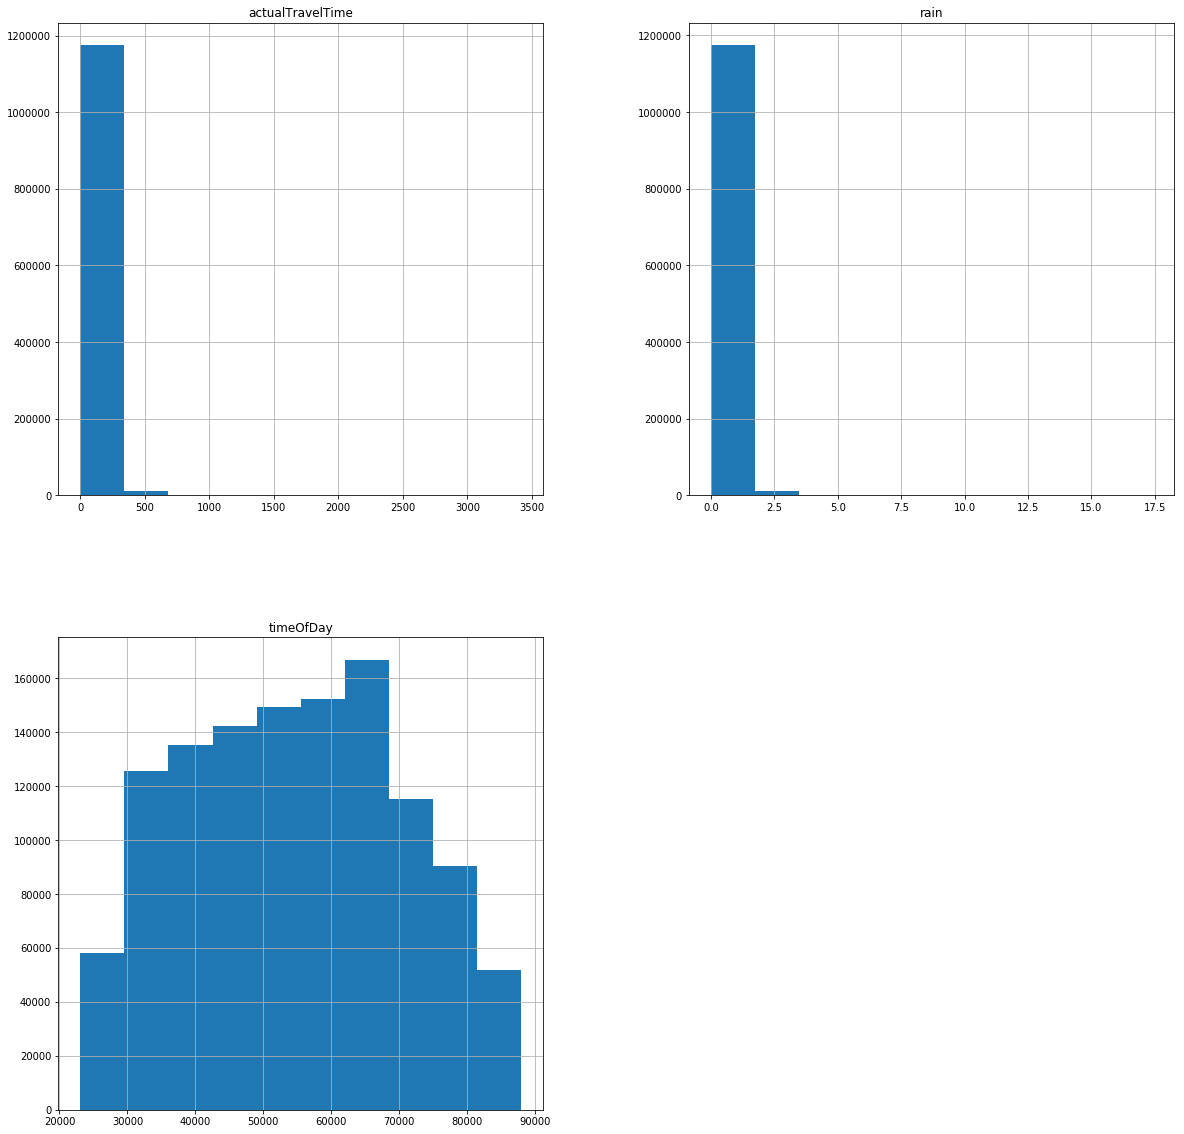

In [76]:
df.select_dtypes(['float64','int64']).hist(figsize=(20,20))

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [39]:
# The actualTravelTime looks weird. Why so many plot part on the 
#left side of 0?
df.loc[df.actualTravelTime < 0]

,,,stopid,desStopid,timeOfDay,month,weekday,rain,actualTravelTime
dayofservice,tripid,progrnumber,,,,,,,
2016-02-03,2827163,1,767,768,82508,2,2,0.1,-300
2016-02-05,2823890,46,7389,7025,69715,2,4,0.0,-850
2016-02-10,2813618,1,767,768,81422,2,2,0.0,-300
2016-03-09,2893283,32,1911,1913,38316,3,2,0.0,-80
2016-03-10,2893081,1,767,768,82471,3,3,0.0,-1
2016-03-29,2908240,1,767,768,30483,3,1,0.0,-964
2016-04-02,2910222,4,770,771,49666,4,5,2.1,-122
2016-04-16,3012950,35,1805,1806,40945,4,5,0.0,-2430
2016-04-29,3033036,32,1911,1913,35140,4,4,0.0,-1


In [40]:
df.loc[df.actualTravelTime < 0].count()

stopid              29
desStopid           29
timeOfDay           29
month               29
weekday             29
rain                29
actualTravelTime    29
dtype: int64

In [38]:
df.count()

stopid              1186982
desStopid           1186982
timeOfDay           1186982
month               1186982
weekday             1186982
rain                1186982
actualTravelTime    1186982
dtype: int64

In [44]:
# Seems like a little bit of outliers here. Dropping...
df = df.loc[df.actualTravelTime > 0]
df.shape

(1186911, 7)

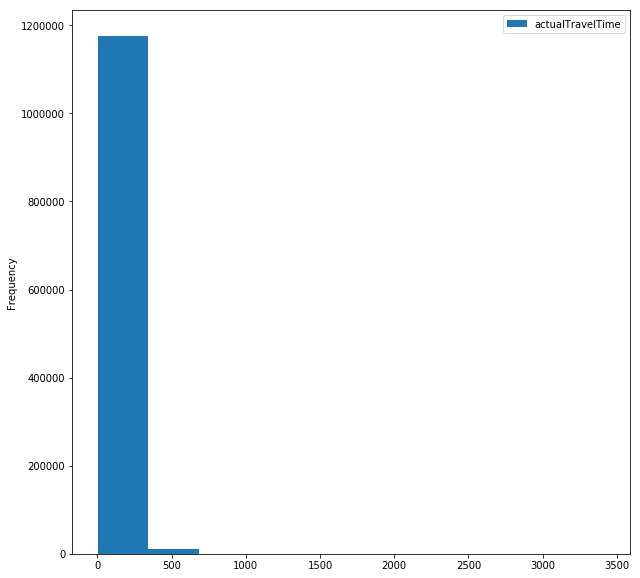

In [74]:
#data['ranking'].plot.hist(ylim=(0,1)) 
df[['actualTravelTime']].plot.hist(figsize=(10,10))

In [61]:
df.loc[(df['actualTravelTime'] == 1)  & (df['stopid'] == 793) & (df['desStopid'] == 7576)].shape[0]/df[df.actualTravelTime == 1 ].shape[0]

0.9772727272727273

In [63]:
# 97.72% of the travel time == 1 is from the same two stops 793 to 7576. and 7576, turns out to be a not exsited bus stop.
# I'll bear this in mind and see how it goes.

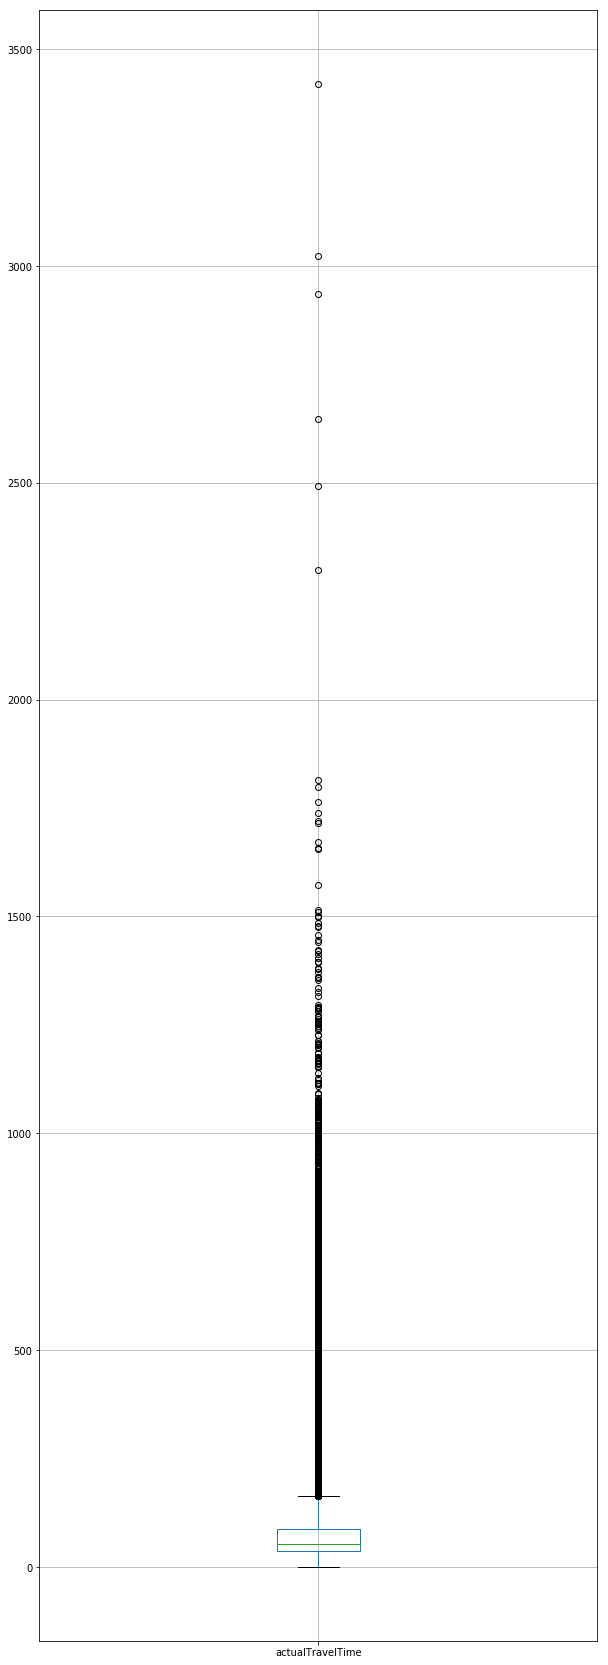

In [75]:
df['actualTravelTime'].plot(kind='box',figsize=(10,30),grid=True)

In [31]:
dfShuffled.sort_values('actualTravelTime')#,ascending=False)

,dayofservice,tripid,progrnumber,stopid,desStopid,timeOfDay,month,weekday,rain,actualTravelTime,em,mp,lm,md,ap,ev,ln
598466,2017-02-28,4388276,20,793,7576,32440,2,1,0.2,1,0,1,0,0,0,0,0
401333,2017-02-21,4380139,20,793,7576,66749,2,1,0.0,1,0,0,0,0,1,0,0
759559,2017-06-30,5116787,20,793,7576,42863,6,4,0.0,1,0,0,1,0,0,0,0
505713,2017-03-01,4386520,20,793,7576,33187,3,2,0.0,1,0,1,0,0,0,0,0
810549,2017-04-10,4575158,20,793,7576,36527,4,0,0.0,1,0,0,1,0,0,0,0
448944,2017-05-22,4886176,20,793,7576,27078,5,0,0.0,1,0,1,0,0,0,0,0
709808,2017-02-22,4394342,20,793,7576,38582,2,2,0.0,1,0,0,1,0,0,0,0
354211,2017-06-18,5083725,20,793,7576,57830,6,6,0.0,1,0,0,0,0,1,0,0
686339,2017-04-26,4594683,20,793,7576,33991,4,2,0.0,1,0,1,0,0,0,0,0
334433,2017-05-04,4608159,20,793,7576,25930,5,3,0.0,1,0,1,0,0,0,0,0


In [ ]:
#I guess the outlier up above do make sense since if a bus in a traffic jam, who knows how long time will it take.

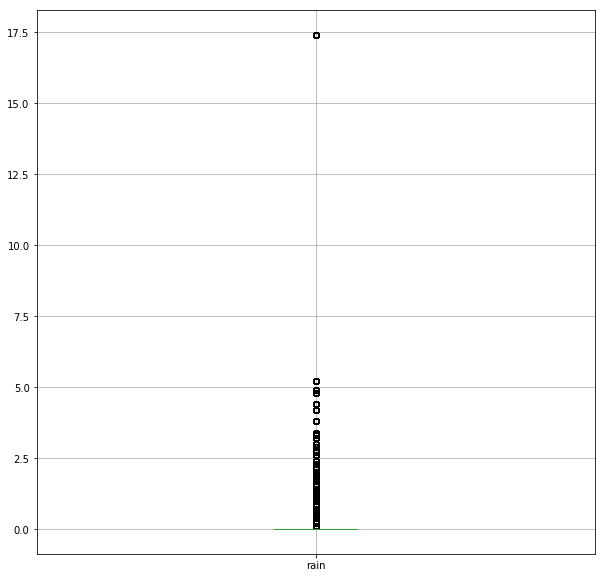

In [78]:
df['rain'].plot(kind='box',figsize=(10,10),grid=True)

In [83]:
#there is one day that have about 17.5 in rain, let's see ...
df.loc[df.rain > 17]

stopid desStopid  timeOfDay month weekday  \
dayofservice tripid  progrnumber                                             
2016-06-14   3219769 53            1873      1874      46807     6       1   
             3219724 36            1806      1660      46810     6       1   
             3219803 25             328      1443      46815     6       1   
             3219671 50            1870      1871      46816     6       1   
             3219769 54            1874      1875      46830     6       1   
             3219656 19             786       793      46834     6       1   
             3219664 61            6107      6108      46839     6       1   
             3219713 16             783       784      46847     6       1   
             3219769 55            1875      1876      46849     6       1   
             3219739 41            1665      1666      46850     6       1   
             3219724 37            1660      1661      46854     6       1   
             3219689 29            1647      1648      46867     6       1   
             3219730 2              768       769      46868     6       1   
             3219739 42            1666      1807      46873     6       1   
             3219664 62            6108      6109      46878     6       1   
             3219769 56            1876      1877      46882     6       1   
             3219664 63            6109      6110      46904     6       1   
             3219769 57            1877      1878      46910     6       1   
             3219730 3              769       770      46910     6       1   
             3219713 17             784       785      46922     6       1   
             3219724 38            1661      1662      46938     6       1   
             3219664 64            6110      7020      46939     6       1   
             3219713 18             785       786      46961     6       1   
             3219769 58            1878      1879      46966     6       1   
             3219730 4              770       771      46969     6       1   
             3219724 39            1662      1664      46984     6       1   
             3219739 43            1807      7167      46987     6       1   
             3219671 51            1871      1872      46997     6       1   
             3219730 5              771       772      46998     6       1   
             3219664 65            7020      7029      47009     6       1   
...                                 ...       ...        ...   ...     ...   
             3219668 7              773       774      50060     6       1   
             3219713 46            7389      7025      50076     6       1   
             3219718 26            1443      1444      50079     6       1   
                     27            1444      1445      50110     6       1   
             3219803 60            1899      6107      50114     6       1   
             3219668 8              774       775      50120     6       1   
             3219689 69            2171      7160      50132     6       1   
                     70            7160      7047      50144     6       1   
             3219774 23            7587      7588      50156     6       1   
             3219668 9              775       776      50165     6       1   
             3219800 29            1647      1648      50194     6       1   
             3219774 24            7588       328      50196     6       1   
             3219730 29            1647      1648      50197     6       1   
             3219689 71            7047      7161      50204     6       1   
             3219718 28            1445      1647      50219     6       1   
             3219726 20             793      7576      50246     6       1   
             3219668 10             776       777      50252     6       1   
             3219689 72            7161      7162      50255     6       1   
             3219803 61            6107      6108      

In [84]:
# http://www.thejournal.ie/flash-flooding-hits-dublin-2823570-Jun2016/
#Checked the news, seems like it is a heavy raining day. 
#Let the outlier survive then. :)

In [85]:
df.dtypes

stopid              category
desStopid           category
timeOfDay              int64
month               category
weekday             category
rain                 float64
actualTravelTime       int64
dtype: object

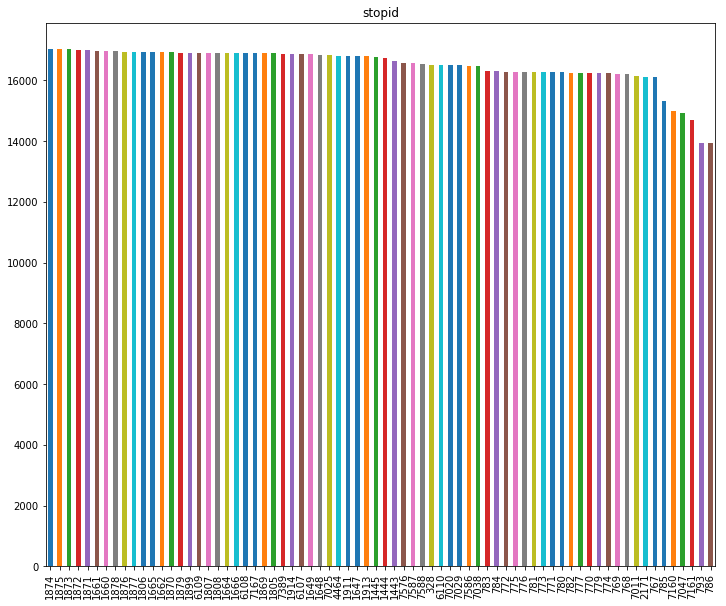

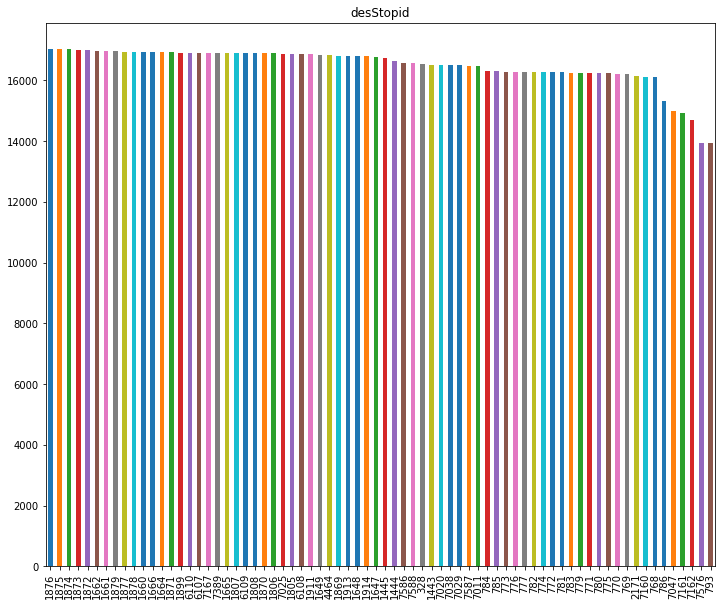

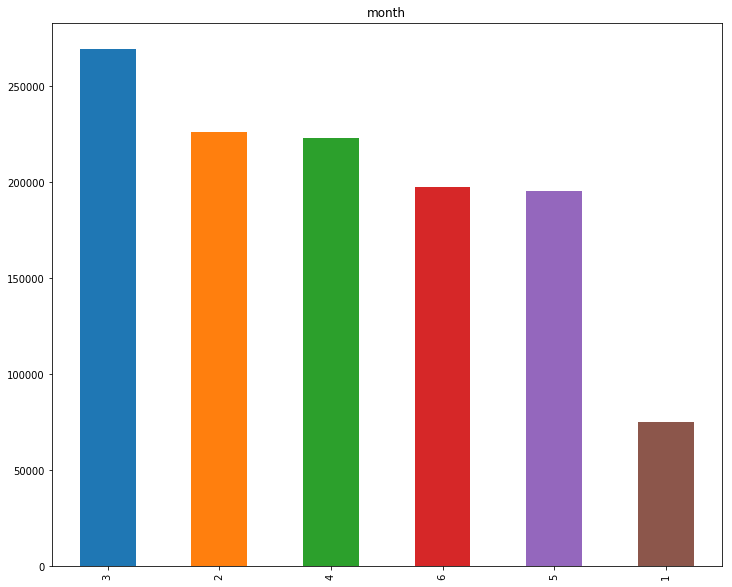

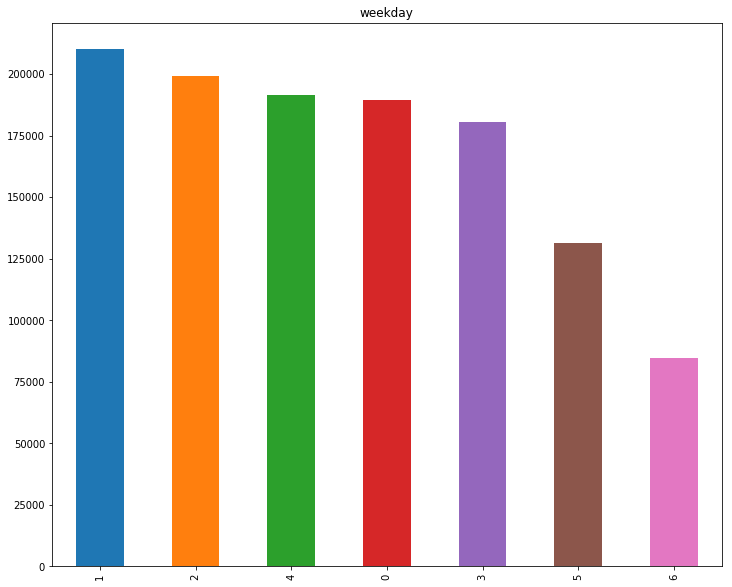

In [87]:
for col in category:
    f = df[col].value_counts().plot(kind='bar',title=col,
                                    figsize = (12,10))
    plt.show()

In [89]:
'''
We got half year's data for two years (not full year) (thank 
God) The Jan has the least data, and I don't know how well it 
will perform for the second half year...
The weekdays I think do make sense since there are less bus 
trip on Saturday and Sunday.
'''

"\nWe got half year's data for two years (not full year) (thank \nGod) The Jan has the least data, and I don't know how well it \nwill perform for the second half year...\nThe weekdays I think do make sense since there are less bus \ntrip on Saturday and Sunday.\n"

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

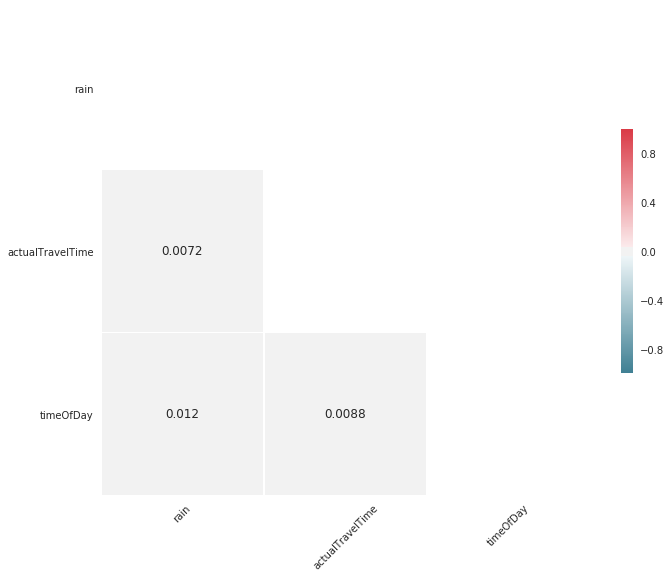

In [93]:
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df[['rain','actualTravelTime','timeOfDay']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

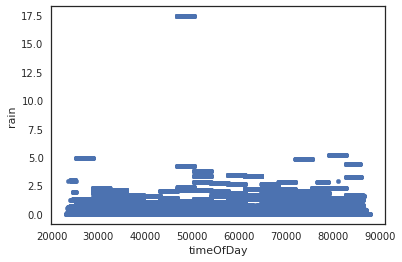

In [94]:
df.plot(kind='scatter', x='timeOfDay', y='rain')

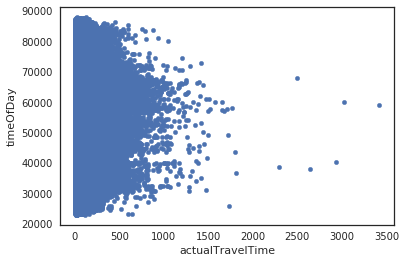

In [95]:
df.plot(kind='scatter', x='actualTravelTime', y='timeOfDay')

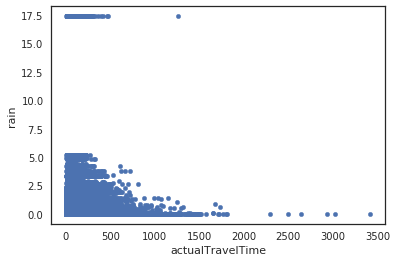

In [96]:
df.plot(kind='scatter', x='actualTravelTime', y='rain')

In [97]:
df.to_csv('separated/39A_40lwCleaned1')

In [98]:
df

stopid desStopid  timeOfDay month weekday  \
dayofservice tripid  progrnumber                                             
2016-01-09   2784478 1              767       768      23391     1       5   
                     2              768       769      23486     1       5   
                     3              769       770      23505     1       5   
                     4              770       771      23535     1       5   
                     5              771       772      23544     1       5   
                     6              772       773      23585     1       5   
                     7              773       774      23607     1       5   
                     8              774       775      23643     1       5   
                     9              775       776      23673     1       5   
                     10             776       777      23695     1       5   
                     11             777       779      23713     1       5   
                     12             779       780      23761     1       5   
                     13             780       781      23780     1       5   
                     14             781       782      23798     1       5   
                     15             782       783      23830     1       5   
                     16             783       784      23852     1       5   
                     17             784       785      23867     1       5   
                     18             785       786      23913     1       5   
                     19             786       793      23965     1       5   
                     20             793      7576      24121     1       5   
                     21            7576      7586      24141     1       5   
                     22            7586      7587      24193     1       5   
                     23            7587      7588      24307     1       5   
                     24            7588       328      24317     1       5   
             2784522 1              767       768      24378     1       5   
                     2              768       769      24463     1       5   
                     3              769       770      24502     1       5   
             2784478 25             328      1443      24510     1       5   
             2784522 4              770       771      24535     1       5   
                     5              771       772      24543     1       5   
...                                 ...       ...        ...   ...     ...   
2017-06-30   5114015 63            6109      6110      85934     6       4   
             5109103 53            1873      1874      85958     6       4   
             5114015 64            6110      7020      85992     6       4   
             5109103 54            1874      1875      86002     6       4   
                     55            1875      1876      86037     6       4   
             5114015 65            7020      7029      86065     6       4   
             5109103 56            1876      1877      86075     6       4   
             5114015 66            7029      7038      86102     6       4   
             5109103 57            1877      1878      86126     6       4   
             5114015 67            7038      7011      86143     6       4   
             5109103 58            1878      1879      86169     6       4   
             5114015 68            7011      2171      86218     6       4   
             5109103 59            1879      1899      86229     6       4   
                     60            1899      6107      86267     6       4   
             5114015 69            2171      7160      86297     6       4   
                     70            7160      7047      86312     6       4   
             5109103 61            6107      6108      86314     6       4   
                     62            6108      6109      86337     6       4   
             5114015 71            7047      7161      

In [99]:
dfShuffled = df.sample(frac=1)
dfShuffled.to_csv('separated/39A_40lwCleanedShuffled')

# Linear Regression

In [2]:
dfShuffled = pd.read_csv('separated/39A_40lwCleanedShuffled')
dfShuffled

,dayofservice,tripid,progrnumber,stopid,desStopid,timeOfDay,month,weekday,rain,actualTravelTime
0,2016-02-02,2820003,29,1647,1648,62137,2,1,0.2,104
1,2017-04-13,4577178,54,1874,1875,71914,4,3,0.0,38
2,2016-04-08,3008569,26,1443,1444,48259,4,4,0.2,94
3,2016-02-29,2888711,3,769,770,49962,2,0,0.7,40
4,2016-05-10,3020568,54,1874,1875,59599,5,1,0.0,17
5,2017-03-06,4386524,59,1879,1899,62663,3,0,0.2,59
6,2016-06-17,3219773,32,1911,1913,38874,6,4,0.0,133
7,2016-02-04,2821831,37,1660,1661,29948,2,3,0.0,75
8,2016-05-04,3023782,25,328,1443,29277,5,2,0.0,159
9,2016-01-16,2784544,46,7389,7025,71391,1,5,0.0,186


In [3]:
dfShuffled[['progrnumber','month','weekday']] = dfShuffled[['progrnumber','month','weekday']].astype('category')

In [11]:
split = int(dfShuffled.shape[0]*0.7)
df_Shuffled_training = dfShuffled[:split]
df_Shuffled_test = dfShuffled[split:]

In [10]:
dfShuffled.dtypes

dayofservice          object
tripid                 int64
progrnumber         category
stopid                 int64
desStopid              int64
timeOfDay              int64
month               category
weekday             category
rain                 float64
actualTravelTime       int64
dtype: object

In [17]:
Xcol=['progrnumber','timeOfDay','month','weekday','rain']
y = 'actualTravelTime'
split = int(dfShuffled.shape[0]*0.7)
X = pd.get_dummies(dfShuffled[X])
X_train, X_test = X[:split], X[split:]
y_train, y_test = dfShuffled[y][:split], dfShuffled[y][split:]

In [7]:
continuous_columns = dfShuffled[['rain','actualTravelTime','timeOfDay']].columns
df_Shuffled_training[continuous_columns].corr()

,rain,actualTravelTime,timeOfDay
rain,1.000000,0.005981,0.012372
actualTravelTime,0.005981,1.000000,0.008761
timeOfDay,0.012372,0.008761,1.000000


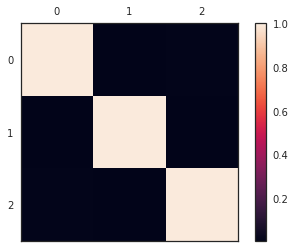

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_Shuffled_training[continuous_columns].corr(), interpolation='nearest')
fig.colorbar(cax)

In [108]:
df_Shuffled_training.columns

Index(['stopid', 'desStopid', 'timeOfDay', 'month', 'weekday', 'rain',
       'actualTravelTime'],
      dtype='object')

In [11]:
df_Shuffled_training#.reset_index()

,dayofservice,tripid,progrnumber,stopid,desStopid,timeOfDay,month,weekday,rain,actualTravelTime
0,2016-02-02,2820003,29,1647,1648,62137,2,1,0.2,104
1,2017-04-13,4577178,54,1874,1875,71914,4,3,0.0,38
2,2016-04-08,3008569,26,1443,1444,48259,4,4,0.2,94
3,2016-02-29,2888711,3,769,770,49962,2,0,0.7,40
4,2016-05-10,3020568,54,1874,1875,59599,5,1,0.0,17
5,2017-03-06,4386524,59,1879,1899,62663,3,0,0.2,59
6,2016-06-17,3219773,32,1911,1913,38874,6,4,0.0,133
7,2016-02-04,2821831,37,1660,1661,29948,2,3,0.0,75
8,2016-05-04,3023782,25,328,1443,29277,5,2,0.0,159
9,2016-01-16,2784544,46,7389,7025,71391,1,5,0.0,186


In [16]:
#df.drop_duplicates(['A', 'B'])
#Seems like in this route, one travel segment only have one progrnumber , and unique stopid to desStopid.
df_Shuffled_training.drop_duplicates(['progrnumber','stopid','desStopid']).shape

(72, 10)

In [17]:
df_Shuffled_training.dtypes

dayofservice         object
tripid                int64
progrnumber           int64
stopid                int64
desStopid             int64
timeOfDay             int64
month                 int64
weekday               int64
rain                float64
actualTravelTime      int64
dtype: object

In [5]:
formula="""actualTravelTime ~ C(progrnumber) + timeOfDay + C(month) + C(weekday) + rain"""
lm_0 = sm.ols(formula,data = df_Shuffled_training).fit()

In [6]:
lm_0.params

Intercept               103.639087
C(progrnumber)[T.2]     -46.327900
C(progrnumber)[T.3]     -57.336926
C(progrnumber)[T.4]     -88.114356
C(progrnumber)[T.5]     -73.740985
C(progrnumber)[T.6]     -69.343262
C(progrnumber)[T.7]     -66.597618
C(progrnumber)[T.8]     -59.248661
C(progrnumber)[T.9]     -57.924535
C(progrnumber)[T.10]    -73.114801
C(progrnumber)[T.11]    -43.711111
C(progrnumber)[T.12]    -79.437585
C(progrnumber)[T.13]    -82.834628
C(progrnumber)[T.14]    -49.015664
C(progrnumber)[T.15]    -29.648922
C(progrnumber)[T.16]    -75.845363
C(progrnumber)[T.17]    -41.665089
C(progrnumber)[T.18]      5.815262
C(progrnumber)[T.19]    126.787093
C(progrnumber)[T.20]    -59.900646
C(progrnumber)[T.21]     -4.851391
C(progrnumber)[T.22]     30.992768
C(progrnumber)[T.23]    -69.176378
C(progrnumber)[T.24]    165.582457
C(progrnumber)[T.25]    148.868085
C(progrnumber)[T.26]    -36.811663
C(progrnumber)[T.27]    -38.576272
C(progrnumber)[T.28]     29.155036
C(progrnumber)[T.29]

In [12]:
#Oh well, seems like the timeOfDay is not that relevant...? 
#Or should I standarize everything??? Check the evaluation.
X_train, y_train = df_Shuffled_training[['progrnumber',
                                         'timeOfDay','month',
                                         'weekday','rain']], df_Shuffled_training[['actualTravelTime']]

In [30]:
X_train.columns

Index(['progrnumber', 'timeOfDay', 'month', 'weekday', 'rain'], dtype='object')

In [13]:
X_test, y_test = df_Shuffled_test[['progrnumber',
                                         'timeOfDay','month',
                                         'weekday','rain']], df_Shuffled_test[['actualTravelTime']]

In [19]:
regr = linear_model.LinearRegression()

In [20]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
save_obj(regr,'lr0')

In [21]:
y_pred = regr.predict(X_test)

In [22]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.12839092e-04  1.07067222e+00  1.77617095e+07  1.77616632e+07
  1.77616522e+07  1.77616214e+07  1.77616358e+07  1.77616402e+07
  1.77616429e+07  1.77616503e+07  1.77616516e+07  1.77616364e+07
  1.77616658e+07  1.77616301e+07  1.77616267e+07  1.77616605e+07
  1.77616799e+07  1.77616337e+07  1.77616679e+07  1.77617153e+07
  1.77618363e+07  1.77616496e+07  1.77617047e+07  1.77617405e+07
  1.77616403e+07  1.77618751e+07  1.77618584e+07  1.77616727e+07
  1.77616709e+07  1.77617387e+07  1.77616954e+07  1.77616508e+07
  1.77616863e+07  1.77616943e+07  1.77616267e+07  1.77616238e+07
  1.77616970e+07  1.77617189e+07  1.77616608e+07  1.77616605e+07
  1.77616762e+07  1.77616430e+07  1.77616297e+07  1.77616728e+07
  1.77616342e+07  1.77616528e+07  1.77617791e+07  1.77617894e+07
  1.77617885e+07  1.77616488e+07  1.77616325e+07  1.77616670e+07
  1.77616388e+07  1.77616473e+07  1.77616368e+07  1.77616279e+07
  1.77616343e+07  1.77616414e+07  1.77616469e+07  1.77616569e+07
  1.77616

In [26]:
'''
This variance score is like a joke. Here's a few things I'd
like to try:
1. standarize timeOfDay.
2. categorize.
If this doesn't help, I'll rebin the timeOfDay into eight time
period in a day and see how that goes.
'''
X_train['timeOfDay'] = preprocessing.scale(X_train['timeOfDay'])
X_train

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,progrnumber,timeOfDay,month,weekday,rain
0,29,0.474589,2,1,0.2
1,54,1.092081,4,3,0.0
2,26,-0.401913,4,4,0.2
3,3,-0.294356,2,0,0.7
4,54,0.314295,5,1,0.0
5,59,0.507810,3,0,0.2
6,32,-0.994648,6,4,0.0
7,37,-1.558393,2,3,0.0
8,25,-1.600772,5,2,0.0
9,46,1.059050,1,5,0.0


In [8]:
def trainAndPredict():
    '''Simple train and predict for linear model'''
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [33]:
trainAndPredict()

Coefficients: 
 [[-0.41631994  1.57276932  0.2867941  -1.00139487  0.81720549]]
Mean squared error: 7996073915.52
Variance score: -1747006.65


In [24]:
# This is really bad :(
X_train['rain'] = preprocessing.scale(X_train['rain'])
trainAndPredict()

/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Coefficients: 
 [ 1.12839091e-04  4.95615901e-01  4.20686530e+07  4.20686067e+07
  4.20685957e+07  4.20685649e+07  4.20685793e+07  4.20685837e+07
  4.20685864e+07  4.20685938e+07  4.20685951e+07  4.20685799e+07
  4.20686093e+07  4.20685736e+07  4.20685702e+07  4.20686040e+07
  4.20686234e+07  4.20685772e+07  4.20686114e+07  4.20686589e+07
  4.20687798e+07  4.20685931e+07  4.20686482e+07  4.20686840e+07
  4.20685839e+07  4.20688186e+07  4.20688019e+07  4.20686162e+07
  4.20686145e+07  4.20686822e+07  4.20686389e+07  4.20685944e+07
  4.20686299e+07  4.20686378e+07  4.20685703e+07  4.20685674e+07
  4.20686405e+07  4.20686624e+07  4.20686044e+07  4.20686041e+07
  4.20686197e+07  4.20685865e+07  4.20685732e+07  4.20686164e+07
  4.20685777e+07  4.20685963e+07  4.20687226e+07  4.20687329e+07
  4.20687320e+07  4.20685924e+07  4.20685761e+07  4.20686105e+07
  4.20685824e+07  4.20685908e+07  4.20685804e+07  4.20685715e+07
  4.20685778e+07  4.20685849e+07  4.20685904e+07  4.20686004e+07
  4.20686

In [25]:
#I think I forgot to standardize test set...
X_test['timeOfDay'] = preprocessing.scale(X_test['timeOfDay'])
X_test['rain'] = preprocessing.scale(X_test['rain'])
trainAndPredict()

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/student/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing impor

Coefficients: 
 [ 1.12839091e-04  4.95615901e-01  4.20686530e+07  4.20686067e+07
  4.20685957e+07  4.20685649e+07  4.20685793e+07  4.20685837e+07
  4.20685864e+07  4.20685938e+07  4.20685951e+07  4.20685799e+07
  4.20686093e+07  4.20685736e+07  4.20685702e+07  4.20686040e+07
  4.20686234e+07  4.20685772e+07  4.20686114e+07  4.20686589e+07
  4.20687798e+07  4.20685931e+07  4.20686482e+07  4.20686840e+07
  4.20685839e+07  4.20688186e+07  4.20688019e+07  4.20686162e+07
  4.20686145e+07  4.20686822e+07  4.20686389e+07  4.20685944e+07
  4.20686299e+07  4.20686378e+07  4.20685703e+07  4.20685674e+07
  4.20686405e+07  4.20686624e+07  4.20686044e+07  4.20686041e+07
  4.20686197e+07  4.20685865e+07  4.20685732e+07  4.20686164e+07
  4.20685777e+07  4.20685963e+07  4.20687226e+07  4.20687329e+07
  4.20687320e+07  4.20685924e+07  4.20685761e+07  4.20686105e+07
  4.20685824e+07  4.20685908e+07  4.20685804e+07  4.20685715e+07
  4.20685778e+07  4.20685849e+07  4.20685904e+07  4.20686004e+07
  4.20686

In [36]:
enc = preprocessing.OneHotEncoder()

In [37]:
enc.fit(X_train[['progrnumber','month','weekday']])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [39]:
enc.n_values_

array([73,  7,  7])

In [40]:
enc.feature_indices_

array([ 0, 73, 80, 87])

In [42]:
onehotlabels = enc.transform(X_train[['progrnumber','month','weekday']]).toarray()
onehotlabels.shape

(830837, 85)

In [43]:

pd.get_dummies(X_train[['progrnumber','month','weekday']])

,progrnumber,month,weekday
0,29,2,1
1,54,4,3
2,26,4,4
3,3,2,0
4,54,5,1
5,59,3,0
6,32,6,4
7,37,2,3
8,25,5,2
9,46,1,5


## is our model better than baseline?

In [31]:
y_test.shape

(356074,)

In [35]:
y_baseline = np.full(y_test.shape[0], 74.23)
y_baseline.shape

(356074,)

In [36]:
r2_score(y_test, y_baseline)

-3.8781372335705555e-08

## Peak hour in a day?

In [39]:
#in order to add the time segment of a day, I want to randomly look into a day to see does that impact on travel time.
# this is a Thursday
sampleDay = dfShuffled.loc[dfShuffled['dayofservice'] =='2016-04-07'].sort_values(['dayofservice','timeOfDay'])
sampleDay

,dayofservice,tripid,progrnumber,stopid,desStopid,timeOfDay,month,weekday,rain,actualTravelTime
799548,2016-04-07,3009146,1,767,768,24028,4,3,0.0,100
246398,2016-04-07,3009146,2,768,769,24128,4,3,0.0,48
441689,2016-04-07,3009146,3,769,770,24176,4,3,0.0,33
554612,2016-04-07,3009146,4,770,771,24209,4,3,0.0,10
1070702,2016-04-07,3009146,5,771,772,24219,4,3,0.0,27
43921,2016-04-07,3009146,6,772,773,24246,4,3,0.0,19
215852,2016-04-07,3009146,7,773,774,24265,4,3,0.0,48
127996,2016-04-07,3009146,8,774,775,24313,4,3,0.0,51
553844,2016-04-07,3009146,9,775,776,24364,4,3,0.0,55
482455,2016-04-07,3009146,10,776,777,24419,4,3,0.0,40


In [79]:
sumByTripid = pd.DataFrame(columns=['tripd','startTime','totalTravelTime'])
for trip in sampleDay.tripid.unique():
    #print(sampleDay.loc[(sampleDay.tripid == trip) & (sampleDay.progrnumber == 1),'timeOfDay'].item())
    if sampleDay.loc[(sampleDay.tripid == trip) & (sampleDay.progrnumber == 1),'timeOfDay'].any():
        x = sampleDay.loc[(sampleDay.tripid == trip) & (sampleDay.progrnumber == 1),'timeOfDay'].values[0]
        df2 = pd.DataFrame([[trip,x,sampleDay.loc[sampleDay.tripid == trip,'actualTravelTime'].sum()]]
                           , columns=['tripd','startTime','totalTravelTime'])
        sumByTripid = sumByTripid.append(df2)
sumByTripid
    

,tripd,startTime,totalTravelTime
0,3009146,24028,4721
0,3005433,24896,4229
0,3007085,25817,5120
0,3011973,26686,5647
0,3006507,27636,5811
0,3007284,28275,5570
0,3006725,28778,5555
0,3011702,29413,5269
0,3011888,30000,5359
0,3004064,30603,5526


In [82]:

sumByTripid.tripd.is_unique

True

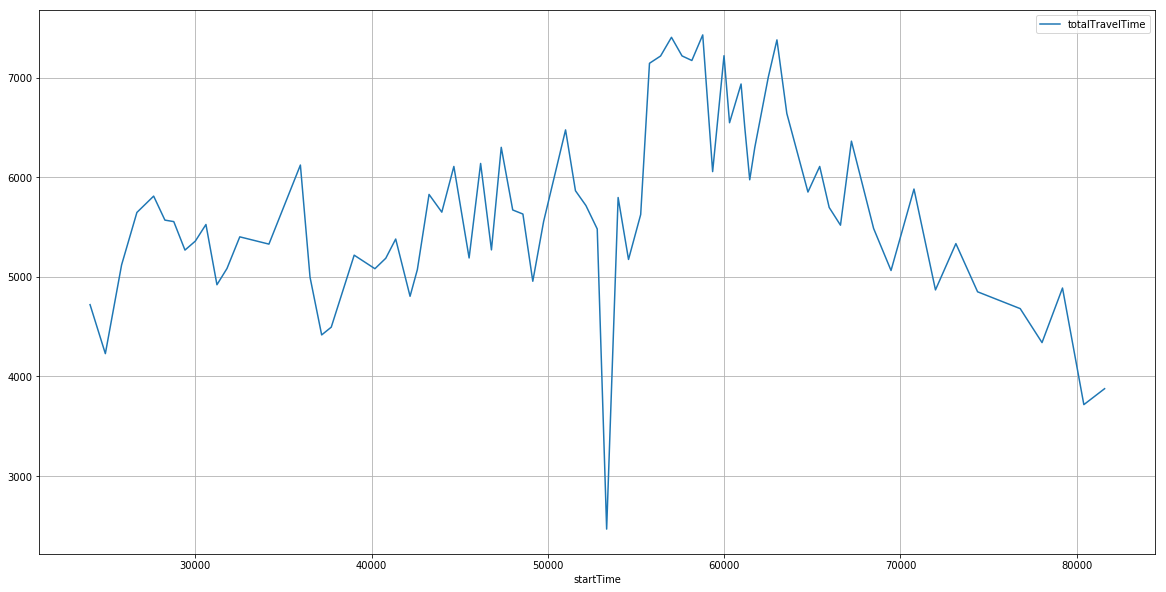

In [90]:
sumByTripid.plot(x='startTime',y='totalTravelTime',grid=True,figsize=(20,10))

In [84]:
sumByTripid.sort_values(['totalTravelTime'])

,tripd,startTime,totalTravelTime
0,3011706,53336,2467
0,3006732,80409,3717
0,3007370,81586,3877
0,3005433,24896,4229
0,3007292,78036,4340
0,3004334,37168,4417
0,3005435,37712,4495
0,3011981,76799,4681
0,3009146,24028,4721
0,3011890,42183,4805


In [87]:
sampleDay.loc[sampleDay['tripid'] == 3011706,:]

,dayofservice,tripid,progrnumber,stopid,desStopid,timeOfDay,month,weekday,rain,actualTravelTime
635614,2016-04-07,3011706,1,767,768,53336,4,3,0.1,80
732575,2016-04-07,3011706,2,768,769,53416,4,3,0.1,44
630251,2016-04-07,3011706,3,769,770,53460,4,3,0.1,34
53633,2016-04-07,3011706,4,770,771,53494,4,3,0.1,12
321095,2016-04-07,3011706,5,771,772,53506,4,3,0.1,40
448373,2016-04-07,3011706,6,772,773,53546,4,3,0.1,22
187299,2016-04-07,3011706,7,773,774,53568,4,3,0.1,42
802588,2016-04-07,3011706,8,774,775,53610,4,3,0.1,34
578410,2016-04-07,3011706,9,775,776,53644,4,3,0.1,45
678714,2016-04-07,3011706,10,776,777,53689,4,3,0.1,65


In [104]:
sumByTripid0 = pd.DataFrame(columns=['tripid','startTime','totalTravelTime'])
for trip in dfShuffled.tripid.unique():
    #print(dfShuffled.loc[(dfShuffled.tripid == trip) & (dfShuffled.progrnumber == 1),'timeOfDay'].item())
    if not dfShuffled.loc[(dfShuffled.tripid == trip) & (dfShuffled.progrnumber == 1)].empty and\
    not dfShuffled.loc[(dfShuffled.tripid == trip) & (dfShuffled.progrnumber == 72)].empty:
        x = dfShuffled.loc[(dfShuffled.tripid == trip) & (dfShuffled.progrnumber == 1),'timeOfDay'].values[0]
        df2 = pd.DataFrame([[trip,x,dfShuffled.loc[dfShuffled.tripid == trip,'actualTravelTime'].sum()]]
                           , columns=['tripid','startTime','totalTravelTime'])
        sumByTripid0 = sumByTripid0.append(df2)
sumByTripid0
    

,tripid,startTime,totalTravelTime
0,4577178,67234,39256
0,3008569,45599,76811
0,2888711,49809,58753
0,3020568,55285,112282
0,4386524,56398,88083
0,3219773,36074,38146
0,2821831,26702,54764
0,3023782,27563,104040
0,2784544,68382,19072
0,3219657,58214,48867


In [105]:
sumByTripid0 = sumByTripid0.sort_values('startTime')

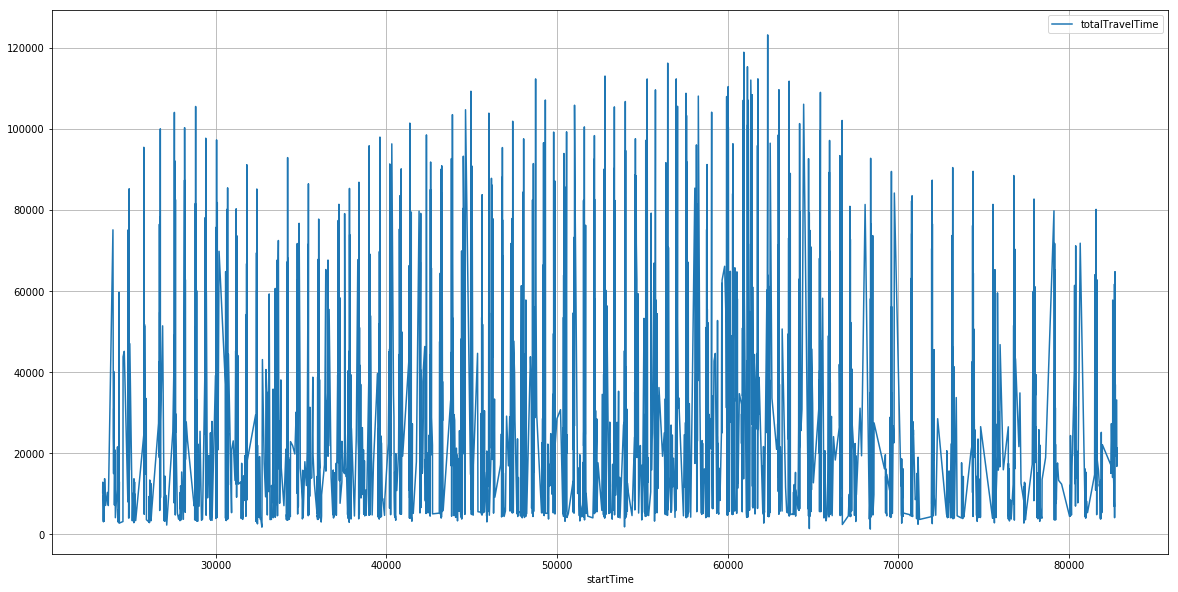

In [108]:
#The problem could be with the trip sometimes don't go to the end, I take only the ones has progrnumber 1 and 72 
#which suppose to mean it fulfill the whole trip and then see how it goes.
sumByTripid0.plot(x='startTime',y='totalTravelTime',grid=True,figsize=(20,10))

In [118]:
'''
conclusion:
I don't see any outstanding  peak hour on the plot, but it's clear there are three big sections:
< ~32,000, a small peak;
~32,000 - ~ 69,000, a gradually growing slope, peak at ~62,000;
> ~ 69,000, the gap between each peak is wider, and travel time is shorter overall.
It's very interesting, let's try period anyway.
period setting:
early morning: 4-7( 14400 - 25200)
morning peak: 7-10 (25200 - 36000)
late morning: 10-13 (36000 - 46800)
mid-day: 13 - 16 ( 46800- 57600)
afternoon peak: 16 - 19 ( 57600 - 68400)
evening: 19 - 22 (68400 - 79200)
late night: 22-1 (79200 - 90000)
mid night: 1-4( >90000, < 14400)
'''
dfShuffled = dfShuffled.drop('period',1)

In [4]:
#df['elderly'] = np.where(df['age']>=50, 'yes', 'no')
dfShuffled['em'] = np.where((dfShuffled['timeOfDay'] > 14400) & (dfShuffled['timeOfDay'] <=  25200),1,0)
dfShuffled['mp'] = np.where((dfShuffled['timeOfDay'] > 25200) & (dfShuffled['timeOfDay'] <=  36000),1,0)
dfShuffled['lm'] = np.where((dfShuffled['timeOfDay'] > 36000) & (dfShuffled['timeOfDay'] <=  46800),1,0)
dfShuffled['md'] = np.where((dfShuffled['timeOfDay'] > 46800) & (dfShuffled['timeOfDay'] <=  47600),1,0)
dfShuffled['ap'] = np.where((dfShuffled['timeOfDay'] > 47600) & (dfShuffled['timeOfDay'] <=  68400),1,0)
dfShuffled['ev'] = np.where((dfShuffled['timeOfDay'] > 68400) & (dfShuffled['timeOfDay'] <=  79200),1,0)
dfShuffled['ln'] = np.where((dfShuffled['timeOfDay'] > 79200) & (dfShuffled['timeOfDay'] <=  90000),1,0)
#dfShuffled['mn'] = np.where((dfShuffled['timeOfDay'] > 90000) | (dfShuffled['timeOfDay'] <=  14400),1,0)
dfShuffled

,dayofservice,tripid,progrnumber,stopid,desStopid,timeOfDay,month,weekday,rain,actualTravelTime,em,mp,lm,md,ap,ev,ln
0,2016-02-02,2820003,29,1647,1648,62137,2,1,0.2,104,0,0,0,0,1,0,0
1,2017-04-13,4577178,54,1874,1875,71914,4,3,0.0,38,0,0,0,0,0,1,0
2,2016-04-08,3008569,26,1443,1444,48259,4,4,0.2,94,0,0,0,0,1,0,0
3,2016-02-29,2888711,3,769,770,49962,2,0,0.7,40,0,0,0,0,1,0,0
4,2016-05-10,3020568,54,1874,1875,59599,5,1,0.0,17,0,0,0,0,1,0,0
5,2017-03-06,4386524,59,1879,1899,62663,3,0,0.2,59,0,0,0,0,1,0,0
6,2016-06-17,3219773,32,1911,1913,38874,6,4,0.0,133,0,0,1,0,0,0,0
7,2016-02-04,2821831,37,1660,1661,29948,2,3,0.0,75,0,1,0,0,0,0,0
8,2016-05-04,3023782,25,328,1443,29277,5,2,0.0,159,0,1,0,0,0,0,0
9,2016-01-16,2784544,46,7389,7025,71391,1,5,0.0,186,0,0,0,0,0,1,0


In [5]:
dfShuffled.dtypes

dayofservice          object
tripid                 int64
progrnumber         category
stopid                 int64
desStopid              int64
timeOfDay              int64
month               category
weekday             category
rain                 float64
actualTravelTime       int64
em                     int64
mp                     int64
lm                     int64
md                     int64
ap                     int64
ev                     int64
ln                     int64
dtype: object

In [6]:
Xcol=['progrnumber','timeOfDay','month','weekday','rain','em','mp','lm','md','ap','ev','ln']#,'mn']
y = 'actualTravelTime'
split = int(dfShuffled.shape[0]*0.7)
X = pd.get_dummies(dfShuffled[Xcol],drop_first=True)
X_train, X_test = X[:split], X[split:]
y_train, y_test = dfShuffled[y][:split], dfShuffled[y][split:]

In [129]:
X.shape

(1186911, 91)

In [127]:
72+8+1+6+7+1

95

In [12]:
'''Simple train and predict for linear model'''
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 5.93094347e-04  7.15807656e-01 -3.67187389e+09 -3.67187388e+09
 -3.67187388e+09 -3.67187388e+09 -3.67187388e+09 -3.67187390e+09
 -3.67187391e+09 -4.62155325e+01 -5.72031763e+01 -8.79409084e+01
 -7.36226730e+01 -6.92463340e+01 -6.65104155e+01 -5.91346343e+01
 -5.79184924e+01 -7.31099044e+01 -4.37961571e+01 -7.95193618e+01
 -8.29344584e+01 -4.91246465e+01 -2.97682344e+01 -7.59798688e+01
 -4.18807046e+01  5.72411034e+00  1.26665546e+02 -5.99187804e+01
 -4.97461229e+00  3.08198484e+01 -6.92142640e+01  1.65540004e+02
  1.48743318e+02 -3.68735482e+01 -3.88100977e+01  2.88379855e+01
 -1.43264324e+01 -5.88573267e+01 -2.33539316e+01 -1.53974111e+01
 -8.28689568e+01 -8.58167712e+01 -1.26324596e+01  9.29399512e+00
 -4.88411585e+01 -4.91249690e+01 -3.33469816e+01 -6.66313689e+01
 -7.98322910e+01 -3.67580351e+01 -7.53191876e+01 -5.67274134e+01
  6.95526405e+01  7.99059710e+01  7.90154536e+01 -6.05699615e+01
 -7.69254931e+01 -4.24044111e+01 -7.05631199e+01 -6.20570382e+01
 -7.25812

In [13]:
save_obj(regr,'39A_40lr')

In [14]:
X_train.columns

Index(['timeOfDay', 'rain', 'em', 'mp', 'lm', 'md', 'ap', 'ev', 'ln',
       'progrnumber_2', 'progrnumber_3', 'progrnumber_4', 'progrnumber_5',
       'progrnumber_6', 'progrnumber_7', 'progrnumber_8', 'progrnumber_9',
       'progrnumber_10', 'progrnumber_11', 'progrnumber_12', 'progrnumber_13',
       'progrnumber_14', 'progrnumber_15', 'progrnumber_16', 'progrnumber_17',
       'progrnumber_18', 'progrnumber_19', 'progrnumber_20', 'progrnumber_21',
       'progrnumber_22', 'progrnumber_23', 'progrnumber_24', 'progrnumber_25',
       'progrnumber_26', 'progrnumber_27', 'progrnumber_28', 'progrnumber_29',
       'progrnumber_30', 'progrnumber_31', 'progrnumber_32', 'progrnumber_33',
       'progrnumber_34', 'progrnumber_35', 'progrnumber_36', 'progrnumber_37',
       'progrnumber_38', 'progrnumber_39', 'progrnumber_40', 'progrnumber_41',
       'progrnumber_42', 'progrnumber_43', 'progrnumber_44', 'progrnumber_45',
       'progrnumber_46', 'progrnumber_47', 'progrnumber_48', 'progrnu

In [15]:
#I had enough fun with linear regression, lets try something else. :)
dfShuffled.shape

(1186911, 17)

>>> from sklearn.preprocessing import StandardScaler  
>>> scaler = StandardScaler()  
>>> # Don't cheat - fit only on training data
>>> scaler.fit(X_train)  
>>> X_train = scaler.transform(X_train)  
>>> # apply same transformation to test data
>>> X_test = scaler.transform(X_test)
MLPRegressor

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X) 
X = scaler.transform(X) 
X_train, X_test = X[:split], X[split:]
y_train, y_test = dfShuffled[y][:split], dfShuffled[y][split:]

In [20]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()
mlp = clf.fit(X_train, y_train)

In [28]:
clf.score(X_test,y_test)

0.7037263825256587

In [42]:
save_obj(clf,'39A_40mlp')

# What if I get rid of stop 7576?

In [41]:
df = pd.read_csv('separated/39A_40lPlain')
df

,dayofservice,tripid,progrnumber,stopid,plannedtime,actual_arr,actual_dep,datetime,month,weekday
0,2016-01-09 00:00:00,2784393,1,767,73800,73722,73722,2016-01-09 20:28:42,1,5
1,2016-01-09 00:00:00,2784393,2,768,73925,73796,73815,2016-01-09 20:29:56,1,5
2,2016-01-09 00:00:00,2784393,3,769,73950,73839,73839,2016-01-09 20:30:39,1,5
3,2016-01-09 00:00:00,2784393,4,770,73992,73876,73876,2016-01-09 20:31:16,1,5
4,2016-01-09 00:00:00,2784393,5,771,74009,73883,73883,2016-01-09 20:31:23,1,5
5,2016-01-09 00:00:00,2784393,6,772,74044,73950,73950,2016-01-09 20:32:30,1,5
6,2016-01-09 00:00:00,2784393,7,773,74077,73986,73986,2016-01-09 20:33:06,1,5
7,2016-01-09 00:00:00,2784393,8,774,74116,74007,74007,2016-01-09 20:33:27,1,5
8,2016-01-09 00:00:00,2784393,9,775,74170,74044,74058,2016-01-09 20:34:04,1,5
9,2016-01-09 00:00:00,2784393,10,776,74209,74092,74092,2016-01-09 20:34:52,1,5


In [ ]:
'''
After a walk outside, I think I'll leave it there, since this segment will not impact on other segments.
But two things I would like to try now:
1. seperate two years data and h
